In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",30)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Ashish Aggarwal\OneDrive\Desktop\GGN BATCH 2022\Project\cedit score classification project\train.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
data.drop(data.index[data.Credit_Score=="Standard"],axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)

In [4]:
data.shape

(46826, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46826 non-null  object 
 1   Customer_ID               46826 non-null  object 
 2   Month                     46826 non-null  object 
 3   Name                      42142 non-null  object 
 4   Age                       46826 non-null  object 
 5   SSN                       46826 non-null  object 
 6   Occupation                46826 non-null  object 
 7   Annual_Income             46826 non-null  object 
 8   Monthly_Inhand_Salary     39711 non-null  float64
 9   Num_Bank_Accounts         46826 non-null  int64  
 10  Num_Credit_Card           46826 non-null  int64  
 11  Interest_Rate             46826 non-null  int64  
 12  Num_of_Loan               46826 non-null  object 
 13  Type_of_Loan              42046 non-null  object 
 14  Delay_

In [6]:
data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        4684
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment      3257
Changed_Credit_Limit           0
Num_Credit_Inquiries         902
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2155
Payment_Behaviour              0
Monthly_Balance              595
Credit_Score                   0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,39711.0,4139.583539,3240.953090,319.556250,1567.845833,3086.756667,5802.140000,15204.633333
Num_Bank_Accounts,46826.0,17.338295,118.816959,-1.000000,3.000000,6.000000,8.000000,1794.000000
Num_Credit_Card,46826.0,22.922415,130.867907,0.000000,4.000000,6.000000,7.000000,1499.000000
Interest_Rate,46826.0,75.344680,472.989766,1.000000,7.000000,15.000000,24.000000,5788.000000
Delay_from_due_date,46826.0,22.566822,16.607156,-5.000000,10.000000,18.000000,31.000000,67.000000
Num_Credit_Inquiries,45924.0,28.391473,194.171683,0.000000,3.000000,6.000000,10.000000,2592.000000
Credit_Utilization_Ratio,46826.0,32.252641,5.125319,20.172942,28.020543,32.283409,36.488939,49.522324
Total_EMI_per_month,46826.0,1407.055823,8291.481867,0.000000,33.366757,73.606419,169.542099,82331.000000


In [8]:
data.drop(["ID","Name"],axis=1,inplace=True)

In [9]:
for i in data.columns:
    print(i,":")
    print(len(data[i].unique()))
    print("***********************************************")

Customer_ID :
8692
***********************************************
Month :
8
***********************************************
Age :
938
***********************************************
SSN :
8673
***********************************************
Occupation :
16
***********************************************
Annual_Income :
11861
***********************************************
Monthly_Inhand_Salary :
8996
***********************************************
Num_Bank_Accounts :
551
***********************************************
Num_Credit_Card :
766
***********************************************
Interest_Rate :
937
***********************************************
Num_of_Loan :
225
***********************************************
Type_of_Loan :
4786
***********************************************
Delay_from_due_date :
73
***********************************************
Num_of_Delayed_Payment :
383
***********************************************
Changed_Credit_Limit :
3780
*************************

In [10]:
for i in data.columns:
    print(i,":")
    print(data[i].value_counts())
    print("***********************************************")

Customer_ID :
CUS_0x663b    8
CUS_0x535a    8
CUS_0x260b    8
CUS_0xad31    8
CUS_0x6080    8
             ..
CUS_0x5f43    1
CUS_0x2847    1
CUS_0xcb9     1
CUS_0xabd     1
CUS_0xb490    1
Name: Customer_ID, Length: 8692, dtype: int64
***********************************************
Month :
June        6090
April       6027
July        6025
May         6022
August      6015
January     5557
February    5555
March       5535
Name: Month, dtype: int64
***********************************************
Age :
28      1414
27      1352
35      1313
39      1307
34      1303
        ... 
1644       1
111        1
1176       1
1418       1
2263       1
Name: Age, Length: 938, dtype: int64
***********************************************
SSN :
#F%$D@*&8      2606
633-97-0538       8
697-92-4285       8
013-67-5026       8
968-80-7886       8
               ... 
812-39-0469       1
968-51-7695       1
169-92-6237       1
342-38-4793       1
191-05-3072       1
Name: SSN, Length: 8673, dtype: int64


In [11]:
data.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment      3257
Changed_Credit_Limit           0
Num_Credit_Inquiries         902
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2155
Payment_Behaviour              0
Monthly_Balance              595
Credit_Score                   0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               46826 non-null  object 
 1   Month                     46826 non-null  object 
 2   Age                       46826 non-null  object 
 3   SSN                       46826 non-null  object 
 4   Occupation                46826 non-null  object 
 5   Annual_Income             46826 non-null  object 
 6   Monthly_Inhand_Salary     39711 non-null  float64
 7   Num_Bank_Accounts         46826 non-null  int64  
 8   Num_Credit_Card           46826 non-null  int64  
 9   Interest_Rate             46826 non-null  int64  
 10  Num_of_Loan               46826 non-null  object 
 11  Type_of_Loan              42046 non-null  object 
 12  Delay_from_due_date       46826 non-null  int64  
 13  Num_of_Delayed_Payment    43569 non-null  object 
 14  Change

In [13]:
a=[]
for i in data.Age:
    if i[-1:]=="_":
        a.append(i.strip("_"))
    else:
        a.append(i)
data["Age"]=a   

In [14]:
data["Age"]=data["Age"].astype(int)

In [15]:
new=data.copy()

In [16]:
new.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [17]:
new.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment      3257
Changed_Credit_Limit           0
Num_Credit_Inquiries         902
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2155
Payment_Behaviour              0
Monthly_Balance              595
Credit_Score                   0
dtype: int64

In [18]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               46826 non-null  object 
 1   Month                     46826 non-null  object 
 2   Age                       46826 non-null  int32  
 3   SSN                       46826 non-null  object 
 4   Occupation                46826 non-null  object 
 5   Annual_Income             46826 non-null  object 
 6   Monthly_Inhand_Salary     39711 non-null  float64
 7   Num_Bank_Accounts         46826 non-null  int64  
 8   Num_Credit_Card           46826 non-null  int64  
 9   Interest_Rate             46826 non-null  int64  
 10  Num_of_Loan               46826 non-null  object 
 11  Type_of_Loan              42046 non-null  object 
 12  Delay_from_due_date       46826 non-null  int64  
 13  Num_of_Delayed_Payment    43569 non-null  object 
 14  Change

In [19]:
a=[]
for i in new.Annual_Income:
    if i[-1:]=="_":
        a.append(i.strip("_"))
    else:
        a.append(i)
new["Annual_Income"]=a

In [20]:
new.loc[new.Occupation=="_______","Occupation"]=np.nan
new.loc[new.Changed_Credit_Limit=="_","Changed_Credit_Limit"]=np.nan
new.loc[new.Credit_Mix=="_","Credit_Mix"]=np.nan

a=[]
for i in new.Outstanding_Debt:
    if i[-1:]=="_":
        a.append(i.strip("_"))
    else:
        a.append(i)
new["Outstanding_Debt"]=a
    
    
new.loc[new.Payment_Behaviour=="!@9#%8","Payment_Behaviour"]=np.nan
new.loc[new.Monthly_Balance=="__-333333333333333333333333333__","Monthly_Balance"]=np.nan

In [21]:
new.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                  3274
Annual_Income                  0
Monthly_Inhand_Salary       7115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4780
Delay_from_due_date            0
Num_of_Delayed_Payment      3257
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9491
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4206
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2155
Payment_Behaviour           3608
Monthly_Balance              597
Credit_Score                   0
dtype: int64

In [22]:
new.loc[new.Credit_History_Age.isnull(),"Credit_History_Age"]="1000 Years and 0 Months"

In [23]:
a=[]
for i in new.Credit_History_Age:
    a.append(int(i.split()[0])*12+int(i.split()[3]))
new["Credit_History_Age"]=a
new["Credit_History_Age"]=new["Credit_History_Age"].astype(int)

In [24]:
new.loc[new.Credit_History_Age==12000,"Credit_History_Age"]=np.nan

In [25]:
a=[]
for i in new.SSN:
    if i[3:4]!="-":
        a.append(np.nan)
    else:
        a.append(i)
new["SSN"]=a

In [26]:
new.SSN.isnull().sum()

2606

In [27]:
new.loc[new.Customer_ID=="CUS_0xa2b2"]

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
4766,CUS_0xa2b2,May,53,NaN,Manager,71305.22,5914.101667,8,4,18,0,NaN,11,15,1.4900000000000002,5.0,Standard,1004.26,25.031974,278.0,No,0.0,208.2886334293821,Low_spent_Small_value_payments,673.1215332372847,Poor
4767,CUS_0xa2b2,June,53,NaN,Manager,71305.22,5914.101667,8,4,18,0,NaN,7,15,15.49,5.0,NaN,1004.26,28.653241,279.0,NM,0.0,273.32658206850755,Low_spent_Medium_value_payments,598.0835845981591,Poor


### Replacing SSN null values with "0-0-0"

In [28]:
new.loc[new.SSN.isnull(),"SSN"]="0-0-0"

In [29]:
new.loc[new.Customer_ID=="CUS_0xa2b2"]

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
4766,CUS_0xa2b2,May,53,0-0-0,Manager,71305.22,5914.101667,8,4,18,0,NaN,11,15,1.4900000000000002,5.0,Standard,1004.26,25.031974,278.0,No,0.0,208.2886334293821,Low_spent_Small_value_payments,673.1215332372847,Poor
4767,CUS_0xa2b2,June,53,0-0-0,Manager,71305.22,5914.101667,8,4,18,0,NaN,7,15,15.49,5.0,NaN,1004.26,28.653241,279.0,NM,0.0,273.32658206850755,Low_spent_Medium_value_payments,598.0835845981591,Poor


In [30]:
new.SSN.isnull().sum()

0

In [31]:
new.loc[new.SSN=="0-0-0"].shape[0]

2606

In [32]:
list1=list(new.loc[new.SSN=="0-0-0","Customer_ID"].unique())

for i in list1:
    print(new.loc[(new.Customer_ID==i)&(new.SSN=="0-0-0"),"SSN"])

In [33]:
for i in list1:
    new.loc[(new.Customer_ID==i)&(new.SSN=="0-0-0"),"SSN"]=new.loc[new.Customer_ID==i,"SSN"].mode()[0]
    
# # CUS_0xa2b2

In [34]:
new.loc[new.SSN=="0-0-0"].shape[0]

198

### intersection of customer_id(l1) with all customer_id(allval) and left over customer_id(l2)

In [35]:
list2=list(new.loc[new.SSN=="0-0-0","Customer_ID"].unique())
allval=list(new.loc[new.SSN!="0-0-0","Customer_ID"].unique())
l1=list(set(list2) & set(allval))

# l1 contains columns which have some non "0-0-0" values in it.

In [36]:
for i in l1:
    new.loc[(new.Customer_ID==i)&(new.SSN=="0-0-0"),"SSN"]=new.loc[(new.Customer_ID==i)&(new.SSN!="0-0-0"),"SSN"].mode()[0]

### List of Customer_id having no SSN code

In [37]:
nullval=list(new.loc[new.SSN=="0-0-0","Customer_ID"].unique())

#columns having no SSN code for the customer

In [38]:
nullval

['CUS_0xa2b2',
 'CUS_0x3f51',
 'CUS_0xa31',
 'CUS_0x16b1',
 'CUS_0xc211',
 'CUS_0x290d',
 'CUS_0x603b',
 'CUS_0xb66c',
 'CUS_0xac5a',
 'CUS_0x102e',
 'CUS_0x1d51',
 'CUS_0x8590',
 'CUS_0xb3bd',
 'CUS_0x1dab',
 'CUS_0x2b57',
 'CUS_0x7168',
 'CUS_0x5597',
 'CUS_0x1bde',
 'CUS_0x6068',
 'CUS_0x30c8']

In [39]:
new.loc[new.SSN=="0-0-0"].shape

(25, 26)

### Dropping customer_id having no details of SSN code

In [40]:
for i in nullval:
    new.drop(new.index[new.Customer_ID==i],axis=0,inplace=True)
new.reset_index(drop=True,inplace=True)

In [41]:
len(l1)

134

In [42]:
occu=list(new.Occupation.unique())
l1=list(new.loc[new.Occupation.isnull(),"Customer_ID"].unique())

In [43]:
a=[]
for i in l1:
    if new.loc[new.Customer_ID==i,"Occupation"].count()==0:
        a.append(i)

### Dropping customer_id having no details of Occupation

In [44]:
for i in a:
    new.drop(new.index[new.Customer_ID==i],axis=0,inplace=True)
new.reset_index(drop=True,inplace=True)

In [45]:
l1=list(new.loc[new.Occupation.isnull(),"Customer_ID"].unique())

In [46]:
for i in l1:
    new.loc[(new.Customer_ID==i)&(new.Occupation.isnull()),"Occupation"]=new.loc[(new.Customer_ID==i),"Occupation"].mode()[0]

# Age

for i in new.Customer_ID:
    print(i,new.loc[(new.Customer_ID==i),"Age"])
    print("********************")

In [47]:
l_age=list(new.Age.unique())
l_age.sort()

In [48]:
l_age

[-500,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 99,
 111,
 112,
 115,
 118,
 123,
 142,
 169,
 181,
 186,
 203,
 210,
 216,
 221,
 236,
 240,
 252,
 262,
 287,
 292,
 293,
 305,
 306,
 325,
 333,
 347,
 372,
 375,
 383,
 395,
 399,
 404,
 434,
 448,
 449,
 456,
 462,
 491,
 493,
 502,
 506,
 514,
 525,
 532,
 535,
 548,
 553,
 556,
 568,
 573,
 581,
 609,
 622,
 624,
 634,
 637,
 640,
 655,
 678,
 690,
 692,
 711,
 725,
 727,
 733,
 736,
 737,
 742,
 751,
 774,
 806,
 813,
 814,
 817,
 819,
 820,
 831,
 844,
 846,
 853,
 869,
 879,
 886,
 890,
 919,
 920,
 921,
 924,
 925,
 933,
 940,
 941,
 946,
 956,
 962,
 992,
 1004,
 1006,
 1024,
 1028,
 1040,
 1051,
 1062,
 1066,
 1070,
 1083,
 1094,
 1095,
 1101,
 1102,
 1112,
 1136,
 1143,
 1144,
 1149,
 1154,
 1172,
 1176,
 1188,
 1191,
 1200,
 1206,
 1217,
 1232,
 1234,


In [49]:
new.loc[(new.Age<0)|(new.Age>56),"Age"]=None

In [50]:
nullage_cust=list(new.loc[new.Age.isnull(),"Customer_ID"].unique())

In [51]:
for i in nullage_cust:
    print(i,new.loc[(new.Customer_ID==i),"Age"])
    print("********************")

CUS_0xd40 0    23.0
1    23.0
2     NaN
3    23.0
4    23.0
5    23.0
6    23.0
Name: Age, dtype: float64
********************
CUS_0x5407 33     NaN
34    30.0
35    30.0
36    30.0
37    30.0
Name: Age, dtype: float64
********************
CUS_0x9a71 119    54.0
120    55.0
121     NaN
122    55.0
Name: Age, dtype: float64
********************
CUS_0xaedb 158    19.0
159    19.0
160    19.0
161    19.0
162    19.0
163    19.0
164     NaN
165    20.0
Name: Age, dtype: float64
********************
CUS_0xb14 182    25.0
183    25.0
184    26.0
185    26.0
186    26.0
187    26.0
188    26.0
189     NaN
Name: Age, dtype: float64
********************
CUS_0x4315 207    23.0
208     NaN
209    23.0
210    23.0
211    23.0
Name: Age, dtype: float64
********************
CUS_0xa156 251    42.0
252    42.0
253    42.0
254    42.0
255     NaN
Name: Age, dtype: float64
********************
CUS_0x6c2e 268     NaN
269    46.0
270    47.0
271    47.0
272    47.0
273    47.0
Name: Age, dtype: float64
**

CUS_0x2719 1792     NaN
1793    44.0
1794    44.0
1795    44.0
1796    44.0
Name: Age, dtype: float64
********************
CUS_0x8484 1851    32.0
1852    32.0
1853     NaN
1854    33.0
1855    33.0
Name: Age, dtype: float64
********************
CUS_0x6902 1889    41.0
1890    41.0
1891    41.0
1892    41.0
1893    41.0
1894     NaN
Name: Age, dtype: float64
********************
CUS_0x9e28 1935     NaN
1936    43.0
1937    43.0
1938    43.0
1939    43.0
1940    43.0
1941    43.0
Name: Age, dtype: float64
********************
CUS_0x1a5a 1957    36.0
1958    36.0
1959     NaN
Name: Age, dtype: float64
********************
CUS_0xa0b 1960    15.0
1961     NaN
1962    15.0
1963    15.0
1964    15.0
1965    16.0
Name: Age, dtype: float64
********************
CUS_0xb68f 2023     NaN
2024    22.0
2025    22.0
2026    22.0
2027    22.0
2028    22.0
2029    22.0
Name: Age, dtype: float64
********************
CUS_0x9714 2118     NaN
2119    18.0
2120    18.0
2121    18.0
2122    18.0
2123    18.0

CUS_0xb378 4207    48.0
4208    48.0
4209    48.0
4210    48.0
4211    48.0
4212     NaN
Name: Age, dtype: float64
********************
CUS_0x432b 4213     NaN
4214    41.0
Name: Age, dtype: float64
********************
CUS_0x3356 4215    46.0
4216    46.0
4217     NaN
4218    47.0
4219    47.0
4220    47.0
4221    47.0
Name: Age, dtype: float64
********************
CUS_0x2ced 4251    36.0
4252     NaN
4253    36.0
4254    36.0
4255    36.0
4256    36.0
4257    36.0
4258    36.0
Name: Age, dtype: float64
********************
CUS_0x7fa 4280    14.0
4281    14.0
4282    14.0
4283    14.0
4284     NaN
Name: Age, dtype: float64
********************
CUS_0x5a67 4285     NaN
4286    34.0
4287    34.0
4288    34.0
4289    34.0
Name: Age, dtype: float64
********************
CUS_0x4dbd 4310    24.0
4311    24.0
4312    24.0
4313    24.0
4314    24.0
4315    24.0
4316    24.0
4317     NaN
Name: Age, dtype: float64
********************
CUS_0xa11d 4324    18.0
4325    18.0
4326    18.0
4327    19.0

CUS_0x6b9f 7103    41.0
7104    41.0
7105    41.0
7106     NaN
7107    41.0
7108    41.0
7109    41.0
Name: Age, dtype: float64
********************
CUS_0x7ccf 7122    14.0
7123    14.0
7124     NaN
7125    14.0
7126    14.0
7127    14.0
7128    15.0
7129    15.0
Name: Age, dtype: float64
********************
CUS_0x37de 7145    34.0
7146    34.0
7147    34.0
7148     NaN
7149    34.0
7150    34.0
7151    35.0
7152    35.0
Name: Age, dtype: float64
********************
CUS_0x2b4c 7260    35.0
7261     NaN
7262    35.0
7263    35.0
7264    35.0
7265    35.0
7266    35.0
7267    35.0
Name: Age, dtype: float64
********************
CUS_0x4ba1 7296    15.0
7297    15.0
7298    15.0
7299     NaN
7300    15.0
7301    15.0
7302    15.0
Name: Age, dtype: float64
********************
CUS_0x645f 7303    30.0
7304    30.0
7305    30.0
7306    30.0
7307    30.0
7308     NaN
Name: Age, dtype: float64
********************
CUS_0x31bd 7361    21.0
7362    21.0
7363     NaN
Name: Age, dtype: float64
****

CUS_0x939a 13379    45.0
13380    46.0
13381    46.0
13382    46.0
13383     NaN
Name: Age, dtype: float64
********************
CUS_0xc24a 13427    31.0
13428    31.0
13429    31.0
13430    31.0
13431    31.0
13432     NaN
13433    31.0
Name: Age, dtype: float64
********************
CUS_0xa2a7 13439    16.0
13440     NaN
13441    16.0
13442    16.0
13443    16.0
13444    16.0
13445    16.0
Name: Age, dtype: float64
********************
CUS_0x1ab3 13453     NaN
13454    40.0
Name: Age, dtype: float64
********************
CUS_0x34b6 13464     NaN
13465    26.0
13466    26.0
13467    26.0
13468    26.0
13469    26.0
Name: Age, dtype: float64
********************
CUS_0x5764 13640    22.0
13641    22.0
13642    22.0
13643     NaN
13644    22.0
13645    22.0
Name: Age, dtype: float64
********************
CUS_0x36a0 13691    51.0
13692    51.0
13693    51.0
13694    52.0
13695    52.0
13696    52.0
13697     NaN
Name: Age, dtype: float64
********************
CUS_0x868 13733     NaN
13734    3

CUS_0x4845 16057     NaN
16058    22.0
16059    22.0
16060    22.0
16061    22.0
16062    22.0
Name: Age, dtype: float64
********************
CUS_0xc65a 16081    44.0
16082    45.0
16083    45.0
16084    45.0
16085    45.0
16086    45.0
16087     NaN
16088    45.0
Name: Age, dtype: float64
********************
CUS_0x69bb 16158    23.0
16159    23.0
16160    23.0
16161     NaN
16162     NaN
16163    23.0
16164    24.0
16165    24.0
Name: Age, dtype: float64
********************
CUS_0xa8c9 16181     NaN
16182    25.0
16183    25.0
16184    25.0
16185    25.0
Name: Age, dtype: float64
********************
CUS_0x6808 16231    43.0
16232    43.0
16233     NaN
16234    43.0
16235    43.0
Name: Age, dtype: float64
********************
CUS_0xb1bc 16239    35.0
16240    35.0
16241    35.0
16242    35.0
16243     NaN
16244    35.0
Name: Age, dtype: float64
********************
CUS_0x362a 16284     NaN
16285    20.0
16286    20.0
16287    20.0
16288    20.0
16289    20.0
16290    20.0
Name: Age, 

CUS_0x34f2 18724    23.0
18725    23.0
18726    23.0
18727    23.0
18728    23.0
18729    23.0
18730     NaN
18731    23.0
Name: Age, dtype: float64
********************
CUS_0x16d5 18732    32.0
18733    32.0
18734     NaN
18735    32.0
Name: Age, dtype: float64
********************
CUS_0xaea6 18865    33.0
18866    33.0
18867    33.0
18868     NaN
18869    34.0
18870    34.0
18871    34.0
Name: Age, dtype: float64
********************
CUS_0x41d5 18911    25.0
18912     NaN
18913    25.0
Name: Age, dtype: float64
********************
CUS_0x7953 18917    44.0
18918    44.0
18919    44.0
18920    44.0
18921    44.0
18922     NaN
18923    45.0
Name: Age, dtype: float64
********************
CUS_0x375e 18932     NaN
18933    15.0
Name: Age, dtype: float64
********************
CUS_0x3382 19008    26.0
19009     NaN
19010    26.0
19011    26.0
19012    27.0
19013     NaN
Name: Age, dtype: float64
********************
CUS_0x4b41 19115    47.0
19116    47.0
19117    47.0
19118    47.0
19119    

CUS_0x7e06 21213    21.0
21214    21.0
21215     NaN
21216    21.0
21217    21.0
21218    21.0
21219    21.0
Name: Age, dtype: float64
********************
CUS_0xec4 21225    52.0
21226    52.0
21227    53.0
21228    53.0
21229    53.0
21230     NaN
Name: Age, dtype: float64
********************
CUS_0xbdac 21231    25.0
21232    26.0
21233     NaN
21234    26.0
21235    26.0
21236    26.0
21237    26.0
Name: Age, dtype: float64
********************
CUS_0x6331 21241    37.0
21242    38.0
21243    38.0
21244    38.0
21245    38.0
21246     NaN
21247    38.0
Name: Age, dtype: float64
********************
CUS_0xbcfc 21270    27.0
21271     NaN
21272    27.0
21273    27.0
21274    27.0
Name: Age, dtype: float64
********************
CUS_0xb98f 21284     NaN
21285    43.0
21286    44.0
21287    44.0
21288    44.0
Name: Age, dtype: float64
********************
CUS_0x9fa9 21289     NaN
21290    51.0
Name: Age, dtype: float64
********************
CUS_0x8c36 21345    15.0
21346     NaN
21347    1

CUS_0x26d7 23703    49.0
23704    49.0
23705    49.0
23706    49.0
23707     NaN
23708    49.0
23709    49.0
Name: Age, dtype: float64
********************
CUS_0x64b4 23718    50.0
23719    50.0
23720    50.0
23721     NaN
Name: Age, dtype: float64
********************
CUS_0x8b0c 23756    18.0
23757    18.0
23758    18.0
23759    18.0
23760    18.0
23761    18.0
23762    19.0
23763     NaN
Name: Age, dtype: float64
********************
CUS_0x3873 23764    41.0
23765    41.0
23766    41.0
23767    41.0
23768    41.0
23769    41.0
23770    41.0
23771     NaN
Name: Age, dtype: float64
********************
CUS_0xa6e0 23778    54.0
23779    54.0
23780    54.0
23781     NaN
23782    54.0
23783    55.0
Name: Age, dtype: float64
********************
CUS_0xaa8d 23813    39.0
23814    39.0
23815    39.0
23816     NaN
Name: Age, dtype: float64
********************
CUS_0x8002 23825    35.0
23826    35.0
23827    35.0
23828    36.0
23829    36.0
23830    36.0
23831     NaN
23832    36.0
Name: Age, 

CUS_0x579e 26279    40.0
26280    40.0
26281     NaN
26282    40.0
26283    40.0
26284    41.0
Name: Age, dtype: float64
********************
CUS_0x659 26290    26.0
26291    26.0
26292     NaN
26293    27.0
26294    27.0
26295    27.0
Name: Age, dtype: float64
********************
CUS_0xa8d8 26311    41.0
26312    41.0
26313    41.0
26314    41.0
26315     NaN
26316    41.0
Name: Age, dtype: float64
********************
CUS_0x5f92 26342    17.0
26343    17.0
26344    17.0
26345    17.0
26346    17.0
26347     NaN
26348    17.0
26349    17.0
Name: Age, dtype: float64
********************
CUS_0xae57 26358    25.0
26359     NaN
26360    25.0
26361    25.0
26362    25.0
26363     NaN
26364    25.0
Name: Age, dtype: float64
********************
CUS_0x51cb 26400    48.0
26401     NaN
26402    48.0
26403    48.0
26404    48.0
26405    48.0
Name: Age, dtype: float64
********************
CUS_0xa964 26406    44.0
26407    44.0
26408    44.0
26409    44.0
26410    44.0
26411     NaN
Name: Age, d

CUS_0x94e9 28647     NaN
28648    36.0
28649    36.0
28650    36.0
28651    36.0
28652    36.0
28653    37.0
Name: Age, dtype: float64
********************
CUS_0x9a0f 28693    15.0
28694     NaN
28695    16.0
28696    16.0
28697    16.0
Name: Age, dtype: float64
********************
CUS_0x5899 28713     NaN
28714    28.0
28715    29.0
28716    29.0
28717    29.0
28718    29.0
Name: Age, dtype: float64
********************
CUS_0x5a61 28728     NaN
28729    25.0
28730    25.0
28731    26.0
28732    26.0
28733    26.0
28734    26.0
28735    26.0
Name: Age, dtype: float64
********************
CUS_0x3efb 28761    38.0
28762    38.0
28763     NaN
28764    38.0
Name: Age, dtype: float64
********************
CUS_0x5a9e 28789    35.0
28790     NaN
Name: Age, dtype: float64
********************
CUS_0x2e9b 28807    14.0
28808    15.0
28809     NaN
28810    15.0
28811    15.0
28812    15.0
28813    15.0
Name: Age, dtype: float64
********************
CUS_0xc3ce 28864    53.0
28865    53.0
28866    

CUS_0xb9a2 31356    25.0
31357    25.0
31358    25.0
31359    26.0
31360    26.0
31361     NaN
31362    26.0
31363    26.0
Name: Age, dtype: float64
********************
CUS_0xb4f 31375    50.0
31376     NaN
31377    50.0
31378    50.0
31379    50.0
31380    50.0
31381    51.0
Name: Age, dtype: float64
********************
CUS_0xc3b8 31428    17.0
31429    17.0
31430     NaN
31431    17.0
31432    17.0
31433    17.0
31434    17.0
31435    17.0
Name: Age, dtype: float64
********************
CUS_0x924 31448    26.0
31449     NaN
31450    26.0
31451    26.0
31452    26.0
31453    26.0
Name: Age, dtype: float64
********************
CUS_0x6acc 31470     NaN
31471    49.0
31472    49.0
Name: Age, dtype: float64
********************
CUS_0x77b7 31569    41.0
31570    41.0
31571    42.0
31572    42.0
31573    42.0
31574    42.0
31575     NaN
Name: Age, dtype: float64
********************
CUS_0x2b05 31611    30.0
31612    30.0
31613    30.0
31614    30.0
31615    30.0
31616     NaN
31617    30.0

CUS_0x4ed5 33665    21.0
33666     NaN
33667    21.0
Name: Age, dtype: float64
********************
CUS_0x3570 33676    53.0
33677     NaN
Name: Age, dtype: float64
********************
CUS_0xa86 33678    39.0
33679    39.0
33680    39.0
33681     NaN
33682    40.0
33683    40.0
Name: Age, dtype: float64
********************
CUS_0x5470 33689     NaN
33690    31.0
33691    31.0
33692    31.0
33693    31.0
33694    31.0
33695    31.0
Name: Age, dtype: float64
********************
CUS_0x84a8 33703    43.0
33704     NaN
33705    43.0
33706    43.0
33707    43.0
33708    43.0
Name: Age, dtype: float64
********************
CUS_0x8977 33735    40.0
33736    40.0
33737    40.0
33738    40.0
33739    40.0
33740    40.0
33741     NaN
Name: Age, dtype: float64
********************
CUS_0x66b8 33751    44.0
33752    44.0
33753     NaN
33754    45.0
Name: Age, dtype: float64
********************
CUS_0x5f3f 33759    43.0
33760    43.0
33761     NaN
33762    44.0
33763    44.0
33764    44.0
33765    4

CUS_0x691b 35491    46.0
35492    47.0
35493    47.0
35494    47.0
35495    47.0
35496     NaN
35497    47.0
35498    47.0
Name: Age, dtype: float64
********************
CUS_0xc416 35595    38.0
35596    38.0
35597    38.0
35598    38.0
35599    38.0
35600    38.0
35601     NaN
35602    38.0
Name: Age, dtype: float64
********************
CUS_0x60af 35679    26.0
35680     NaN
35681    26.0
35682    26.0
35683    27.0
35684    27.0
35685    27.0
Name: Age, dtype: float64
********************
CUS_0xb035 35693    31.0
35694    31.0
35695    31.0
35696     NaN
35697    31.0
35698    32.0
Name: Age, dtype: float64
********************
CUS_0x84d0 35707    32.0
35708    32.0
35709     NaN
35710    32.0
35711    32.0
35712    32.0
35713    32.0
Name: Age, dtype: float64
********************
CUS_0x4f28 35724    36.0
35725    36.0
35726    36.0
35727    36.0
35728    37.0
35729    37.0
35730    37.0
35731     NaN
Name: Age, dtype: float64
********************
CUS_0x677f 35743    45.0
35744    45

CUS_0x5721 38306     NaN
38307    29.0
38308    29.0
38309    29.0
38310    29.0
38311    29.0
Name: Age, dtype: float64
********************
CUS_0xa5ee 38319    49.0
38320    50.0
38321    50.0
38322    50.0
38323     NaN
38324    50.0
38325    50.0
Name: Age, dtype: float64
********************
CUS_0x929a 38506    35.0
38507    35.0
38508    35.0
38509    35.0
38510     NaN
38511    35.0
38512    35.0
Name: Age, dtype: float64
********************
CUS_0x22ac 38595     NaN
38596    18.0
38597    18.0
38598    18.0
Name: Age, dtype: float64
********************
CUS_0x39a0 38599    33.0
38600    33.0
38601    33.0
38602     NaN
38603    33.0
38604    33.0
38605    33.0
38606    33.0
Name: Age, dtype: float64
********************
CUS_0x9f20 38613    53.0
38614    53.0
38615    53.0
38616    53.0
38617     NaN
38618    53.0
38619    53.0
38620    53.0
Name: Age, dtype: float64
********************
CUS_0x446c 38632    43.0
38633    43.0
38634    43.0
38635     NaN
38636    43.0
38637    44

CUS_0x4475 42399    18.0
42400    18.0
42401    19.0
42402     NaN
42403    19.0
42404    19.0
42405    19.0
Name: Age, dtype: float64
********************
CUS_0x2a55 42532    43.0
42533     NaN
42534    43.0
Name: Age, dtype: float64
********************
CUS_0x312b 42548    28.0
42549    28.0
42550     NaN
42551    28.0
42552    28.0
42553    28.0
42554    28.0
42555    29.0
Name: Age, dtype: float64
********************
CUS_0x74e5 42556    24.0
42557     NaN
42558    24.0
Name: Age, dtype: float64
********************
CUS_0x92e9 42614     NaN
42615    17.0
Name: Age, dtype: float64
********************
CUS_0x7d66 42633    46.0
42634    46.0
42635     NaN
42636    46.0
42637    46.0
42638    47.0
42639    47.0
Name: Age, dtype: float64
********************
CUS_0x2f9d 42654    31.0
42655    31.0
42656    31.0
42657    31.0
42658     NaN
Name: Age, dtype: float64
********************
CUS_0x9a0c 42780    21.0
42781    21.0
42782     NaN
42783    21.0
42784    21.0
42785    21.0
Name: Age

In [52]:
for i in nullage_cust:
    print(i,new.loc[(new.Customer_ID==i),"Age"].mode()[0])
    print("************************")

CUS_0xd40 23.0
************************
CUS_0x5407 30.0
************************
CUS_0x9a71 55.0
************************
CUS_0xaedb 19.0
************************
CUS_0xb14 26.0
************************
CUS_0x4315 23.0
************************
CUS_0xa156 42.0
************************
CUS_0x6c2e 47.0
************************
CUS_0x6794 42.0
************************
CUS_0x3861 53.0
************************
CUS_0x7caf 29.0
************************
CUS_0x21e6 48.0
************************
CUS_0xc1c9 46.0
************************
CUS_0x230a 47.0
************************
CUS_0x32a5 22.0
************************
CUS_0x710f 20.0
************************
CUS_0x1a96 50.0
************************
CUS_0x31d5 48.0
************************
CUS_0xb9ea 34.0
************************
CUS_0x8e75 46.0
************************
CUS_0x4028 36.0
************************
CUS_0x3e81 20.0
************************
CUS_0xb374 32.0
************************
CUS_0x3e2d 34.0
************************
CUS_0x4ea5 45.0
**

KeyError: 0

In [53]:
nullage_cust.index("CUS_0x18b5")

117

In [54]:
nullage_cust[118:119]

['CUS_0xa329']

In [55]:
a=[]
for i in nullage_cust:
    if new.loc[new.Customer_ID==i,"Age"].count()==0:
        a.append(i)

In [56]:
for i in a:
    print(i,new.loc[new.Customer_ID==i,["Age","Occupation"]])
    print("***********************************")

CUS_0xa329       Age     Occupation
3626  NaN  Media_Manager
***********************************
CUS_0x7a53       Age  Occupation
6375  NaN  Accountant
***********************************
CUS_0xc5fe       Age Occupation
6614  NaN     Doctor
***********************************
CUS_0x74a3        Age Occupation
25209  NaN  Developer
***********************************
CUS_0xa255        Age    Occupation
34691  NaN  Entrepreneur
34692  NaN  Entrepreneur
***********************************
CUS_0x8d5d        Age  Occupation
45415  NaN  Journalist
***********************************


In [57]:
new.loc[(new.Customer_ID=="CUS_0xa329"),"Age"]=int(new.loc[new.Occupation=="Media_Manager","Age"].mean())
new.loc[(new.Customer_ID=="CUS_0x7a53"),"Age"]=int(new.loc[new.Occupation=="Accountant","Age"].mean())
new.loc[(new.Customer_ID=="CUS_0xc5fe"),"Age"]=int(new.loc[new.Occupation=="Doctor","Age"].mean())
new.loc[(new.Customer_ID=="CUS_0x74a3"),"Age"]=int(new.loc[new.Occupation=="Developer","Age"].mean())
new.loc[(new.Customer_ID=="CUS_0xa255"),"Age"]=int(new.loc[new.Occupation=="Entrepreneur","Age"].mean())
new.loc[(new.Customer_ID=="CUS_0x8d5d"),"Age"]=int(new.loc[new.Occupation=="Journalist","Age"].mean())

In [58]:
new.isnull().sum()

Customer_ID                    0
Month                          0
Age                         1319
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7103
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4768
Delay_from_due_date            0
Num_of_Delayed_Payment      3252
Changed_Credit_Limit        1000
Num_Credit_Inquiries         902
Credit_Mix                  9479
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4201
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2153
Payment_Behaviour           3605
Monthly_Balance              596
Credit_Score                   0
dtype: int64

In [59]:
for i in nullage_cust:
    new.loc[(new.Customer_ID==i)&(new.Age.isnull()),"Age"]=new.loc[new.Customer_ID==i,"Age"].mode()[0]

# Annual Income

In [60]:
new.Annual_Income=new.Annual_Income.astype("float")

In [61]:
'''for i in new.Customer_ID:
    print(i,new.loc[new.Customer_ID==i,"Annual_Income"])
    print("**************************************")'''
    
    
for i in new.Customer_ID:
    new.loc[(new.Customer_ID==i),"Annual_Income"]=new.loc[new.Customer_ID==i,"Annual_Income"].mode()[0]

In [62]:
new.Annual_Income.describe()

count    4.677000e+04
mean     5.107799e+04
std      1.463115e+05
min      7.005930e+03
25%      1.874308e+04
50%      3.746404e+04
75%      6.993208e+04
max      1.888478e+07
Name: Annual_Income, dtype: float64

In [63]:
new.loc[new.Annual_Income==16275381.00,"Annual_Income"]=new.Annual_Income.mean()
new.loc[new.Annual_Income==17706148.00,"Annual_Income"]=new.Annual_Income.mean()
new.loc[new.Annual_Income==16275381.00,"Annual_Income"]=new.Annual_Income.mean()
new.loc[new.Annual_Income==18884777.00,"Annual_Income"]=new.Annual_Income.mean()

In [64]:
new.Annual_Income.sort_values(ascending=False).head(10)

7491    179987.28
7492    179987.28
7493    179987.28
7489    179987.28
7487    179987.28
7488    179987.28
7490    179987.28
4188    179948.84
4186    179948.84
4187    179948.84
Name: Annual_Income, dtype: float64

# Monthly Inhand Salary

In [65]:
nullmis_cust=list(new.loc[new.Monthly_Inhand_Salary.isnull(),"Customer_ID"].unique())

In [66]:
a=[]
for i in nullmis_cust:
    if new.loc[new.Customer_ID==i,"Monthly_Inhand_Salary"].count()==0:
        a.append(i)

In [67]:
for i in a:
    print(new.loc[new.Customer_ID==i,"Occupation"])
    print("***********************")

166    Entrepreneur
Name: Occupation, dtype: object
***********************
1425    Doctor
Name: Occupation, dtype: object
***********************
5107    Writer
Name: Occupation, dtype: object
***********************
6124    Mechanic
Name: Occupation, dtype: object
***********************
6365    Mechanic
6366    Mechanic
Name: Occupation, dtype: object
***********************
8190    Architect
Name: Occupation, dtype: object
***********************
10465    Entrepreneur
Name: Occupation, dtype: object
***********************
10701    Accountant
Name: Occupation, dtype: object
***********************
10903    Writer
Name: Occupation, dtype: object
***********************
12101    Doctor
Name: Occupation, dtype: object
***********************
12552    Musician
Name: Occupation, dtype: object
***********************
13990    Teacher
13991    Teacher
Name: Occupation, dtype: object
***********************
15230    Entrepreneur
Name: Occupation, dtype: object
***********************
15765

### Imputing null values for Customer_id where no Monthly_Inhand_Salary is given

In [68]:
for i in a:
    o=new.loc[new.Customer_ID==i,"Occupation"].mode()[0]
    new.loc[(new.Customer_ID==i),"Monthly_Inhand_Salary"]=new.loc[new.Occupation==o,"Monthly_Inhand_Salary"].mean()
    


### Imputing null values with mode

In [69]:
for i in nullmis_cust:
    new.loc[(new.Customer_ID==i)&(new.Monthly_Inhand_Salary.isnull()),"Monthly_Inhand_Salary"]=new.loc[(new.Customer_ID==i)&(new.Monthly_Inhand_Salary.notnull()),"Monthly_Inhand_Salary"].mode()[0]
    

In [70]:
new.Monthly_Inhand_Salary=round(new.Monthly_Inhand_Salary,2)

# Num_Bank_Accounts

In [71]:
l1=list(new.Num_Bank_Accounts.unique())
l1.sort()

In [72]:
l1

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 27,
 28,
 29,
 30,
 33,
 34,
 35,
 37,
 38,
 39,
 42,
 43,
 49,
 50,
 55,
 57,
 60,
 64,
 67,
 68,
 69,
 70,
 74,
 75,
 77,
 79,
 83,
 84,
 87,
 94,
 99,
 105,
 108,
 112,
 115,
 116,
 121,
 122,
 125,
 135,
 136,
 137,
 140,
 143,
 145,
 148,
 156,
 157,
 158,
 159,
 161,
 166,
 170,
 175,
 179,
 182,
 184,
 186,
 193,
 196,
 197,
 198,
 205,
 210,
 212,
 216,
 217,
 222,
 229,
 230,
 239,
 243,
 244,
 245,
 246,
 265,
 270,
 274,
 275,
 280,
 283,
 285,
 288,
 292,
 295,
 299,
 300,
 302,
 304,
 307,
 310,
 312,
 313,
 314,
 316,
 317,
 318,
 322,
 324,
 330,
 333,
 338,
 339,
 340,
 341,
 347,
 350,
 351,
 353,
 364,
 375,
 376,
 383,
 385,
 386,
 392,
 394,
 397,
 406,
 409,
 415,
 417,
 418,
 423,
 424,
 429,
 435,
 441,
 443,
 444,
 446,
 449,
 453,
 460,
 463,
 467,
 468,
 473,
 476,
 480,
 483,
 484,
 485,
 488,
 490,
 494,
 497,
 499,
 501,
 505,
 510,
 511,
 514,
 521,
 526,
 528,
 534,
 535,
 540,
 541,
 548,
 549,
 550

In [73]:
for i in l1:
    print(i,new.loc[new.Num_Bank_Accounts==i].shape)
    print("*******************")

-1 (15, 26)
*******************
0 (2675, 26)
*******************
1 (2766, 26)
*******************
2 (2769, 26)
*******************
3 (4805, 26)
*******************
4 (4888, 26)
*******************
5 (4821, 26)
*******************
6 (5588, 26)
*******************
7 (5560, 26)
*******************
8 (5481, 26)
*******************
9 (3491, 26)
*******************
10 (3274, 26)
*******************
11 (6, 26)
*******************
27 (1, 26)
*******************
28 (1, 26)
*******************
29 (1, 26)
*******************
30 (1, 26)
*******************
33 (1, 26)
*******************
34 (2, 26)
*******************
35 (1, 26)
*******************
37 (1, 26)
*******************
38 (1, 26)
*******************
39 (1, 26)
*******************
42 (2, 26)
*******************
43 (1, 26)
*******************
49 (1, 26)
*******************
50 (1, 26)
*******************
55 (1, 26)
*******************
57 (1, 26)
*******************
60 (1, 26)
*******************
64 (1, 26)
*******************
67 (2, 26)
****

851 (1, 26)
*******************
854 (1, 26)
*******************
856 (1, 26)
*******************
857 (3, 26)
*******************
858 (1, 26)
*******************
860 (1, 26)
*******************
864 (1, 26)
*******************
865 (1, 26)
*******************
868 (1, 26)
*******************
870 (1, 26)
*******************
871 (2, 26)
*******************
875 (1, 26)
*******************
882 (2, 26)
*******************
885 (2, 26)
*******************
887 (1, 26)
*******************
889 (1, 26)
*******************
891 (1, 26)
*******************
892 (1, 26)
*******************
905 (1, 26)
*******************
908 (1, 26)
*******************
912 (1, 26)
*******************
916 (2, 26)
*******************
918 (1, 26)
*******************
921 (2, 26)
*******************
926 (1, 26)
*******************
927 (2, 26)
*******************
931 (2, 26)
*******************
933 (1, 26)
*******************
935 (1, 26)
*******************
936 (1, 26)
*******************
940 (1, 26)
*******************
942 (1, 

In [74]:
new.loc[(new.Num_Bank_Accounts<0)|(new.Num_Bank_Accounts>11),"Num_Bank_Accounts"]=np.nan

In [75]:
new.Num_Bank_Accounts.isnull().sum()

646

In [76]:
nullnba_cust=list(new.loc[new.Num_Bank_Accounts.isnull(),"Customer_ID"].unique())

In [77]:
a=[]
for i in nullnba_cust:
    if new.loc[new.Customer_ID==i,"Num_Bank_Accounts"].count()==0:
        a.append(i)

In [78]:
a

['CUS_0xa95', 'CUS_0x4f2a']

In [79]:
new.loc[new.Customer_ID=="CUS_0xa95","Num_Bank_Accounts"]=1
new.loc[new.Customer_ID=="CUS_0x4f2a","Num_Bank_Accounts"]=1

In [80]:
for i in nullnba_cust:
    new.loc[(new.Customer_ID==i)&(new.Num_Bank_Accounts.isnull()),"Num_Bank_Accounts"]=new.loc[(new.Customer_ID==i)&(new.Num_Bank_Accounts.notnull()),"Num_Bank_Accounts"].mode()[0]

In [81]:
new.Num_Bank_Accounts=new.Num_Bank_Accounts.astype("int")

# Num_Credit_Card

In [82]:
l1=list(new.Num_Credit_Card.unique())
l1.sort()

In [83]:
for i in l1:
    print(i,new.loc[new.Num_Credit_Card==i].shape)
    print("*******************")

0 (10, 26)
*******************
1 (1663, 26)
*******************
2 (1668, 26)
*******************
3 (5005, 26)
*******************
4 (5391, 26)
*******************
5 (8706, 26)
*******************
6 (6875, 26)
*******************
7 (7108, 26)
*******************
8 (3206, 26)
*******************
9 (2961, 26)
*******************
10 (3093, 26)
*******************
11 (22, 26)
*******************
15 (1, 26)
*******************
16 (1, 26)
*******************
20 (1, 26)
*******************
21 (1, 26)
*******************
25 (3, 26)
*******************
26 (1, 26)
*******************
27 (2, 26)
*******************
28 (1, 26)
*******************
29 (1, 26)
*******************
31 (1, 26)
*******************
33 (1, 26)
*******************
37 (3, 26)
*******************
43 (2, 26)
*******************
44 (2, 26)
*******************
48 (1, 26)
*******************
52 (1, 26)
*******************
54 (2, 26)
*******************
60 (1, 26)
*******************
61 (3, 26)
*******************
64 (3, 26)
******

666 (1, 26)
*******************
667 (2, 26)
*******************
669 (1, 26)
*******************
670 (1, 26)
*******************
671 (1, 26)
*******************
674 (1, 26)
*******************
675 (1, 26)
*******************
676 (1, 26)
*******************
677 (1, 26)
*******************
680 (2, 26)
*******************
681 (1, 26)
*******************
685 (1, 26)
*******************
687 (1, 26)
*******************
688 (2, 26)
*******************
689 (1, 26)
*******************
691 (1, 26)
*******************
692 (1, 26)
*******************
695 (1, 26)
*******************
698 (2, 26)
*******************
700 (1, 26)
*******************
705 (1, 26)
*******************
707 (3, 26)
*******************
708 (1, 26)
*******************
709 (1, 26)
*******************
712 (1, 26)
*******************
715 (1, 26)
*******************
716 (2, 26)
*******************
718 (1, 26)
*******************
722 (2, 26)
*******************
725 (1, 26)
*******************
726 (1, 26)
*******************
728 (3, 

In [84]:
new.loc[new.Num_Credit_Card>11,"Num_Credit_Card"]=np.nan

In [85]:
nullncc_cust=list(new.loc[new.Num_Credit_Card.isnull(),"Customer_ID"])

In [86]:
a=[]
for i in nullncc_cust:
    if new.loc[new.Customer_ID==i,"Num_Credit_Card"].count()==0:
        a.append(i)

In [87]:
a

['CUS_0x2847',
 'CUS_0x5f43',
 'CUS_0x3ef',
 'CUS_0x61a6',
 'CUS_0x3be5',
 'CUS_0xc5ae',
 'CUS_0xc5ae',
 'CUS_0x9939']

In [88]:
for i in a:
    new.loc[new.Customer_ID==i,"Num_Credit_Card"]=1

In [89]:
for i in nullncc_cust:
    new.loc[(new.Customer_ID==i)&(new.Num_Credit_Card.isnull()),"Num_Credit_Card"]=new.loc[(new.Customer_ID==i)&(new.Num_Credit_Card.notnull()),"Num_Credit_Card"].mode()[0]

In [90]:
new.Num_Credit_Card.isnull().sum()

0

In [91]:
new.Num_Credit_Card=new.Num_Credit_Card.astype("int")

In [92]:
new.Num_Credit_Card.unique()

array([ 4,  5,  1,  7,  6,  8,  2, 10,  9,  3,  0, 11])

# Interest_Rate

In [93]:
l1=list(new.Interest_Rate.unique())
l1.sort()
l1

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 64,
 75,
 76,
 81,
 89,
 95,
 98,
 100,
 101,
 107,
 108,
 113,
 115,
 146,
 174,
 177,
 200,
 203,
 207,
 208,
 219,
 224,
 238,
 243,
 260,
 261,
 262,
 265,
 268,
 289,
 299,
 318,
 323,
 330,
 332,
 343,
 355,
 360,
 362,
 375,
 381,
 382,
 388,
 390,
 405,
 406,
 410,
 411,
 413,
 417,
 419,
 430,
 433,
 438,
 441,
 443,
 447,
 450,
 453,
 454,
 457,
 459,
 465,
 471,
 472,
 495,
 498,
 519,
 520,
 524,
 527,
 536,
 552,
 554,
 556,
 561,
 563,
 567,
 570,
 572,
 581,
 584,
 591,
 609,
 620,
 624,
 642,
 652,
 671,
 672,
 674,
 682,
 684,
 689,
 690,
 692,
 707,
 710,
 729,
 733,
 738,
 739,
 748,
 749,
 751,
 754,
 757,
 778,
 781,
 795,
 799,
 802,
 804,
 808,
 816,
 819,
 821,
 826,
 844,
 845,
 846,
 849,
 858,
 863,
 866,
 870,
 883,
 887,
 890,
 903,
 910,
 913,
 916,
 917,
 918,
 926,
 929,
 937,
 938,
 946,
 949,


In [94]:
for i in l1:
    print(i,new.loc[new.Interest_Rate==i].shape)
    print("*************************")

1 (1609, 26)
*************************
2 (1581, 26)
*************************
3 (1719, 26)
*************************
4 (1745, 26)
*************************
5 (2079, 26)
*************************
6 (1786, 26)
*************************
7 (1897, 26)
*************************
8 (2212, 26)
*************************
9 (1790, 26)
*************************
10 (1759, 26)
*************************
11 (1925, 26)
*************************
12 (1841, 26)
*************************
13 (296, 26)
*************************
14 (311, 26)
*************************
15 (1394, 26)
*************************
16 (1450, 26)
*************************
17 (1346, 26)
*************************
18 (1532, 26)
*************************
19 (1342, 26)
*************************
20 (1372, 26)
*************************
21 (1031, 26)
*************************
22 (1205, 26)
*************************
23 (1177, 26)
*************************
24 (1186, 26)
*************************
25 (982, 26)
*************************
26 (969, 26)

2059 (1, 26)
*************************
2060 (1, 26)
*************************
2063 (1, 26)
*************************
2069 (1, 26)
*************************
2071 (1, 26)
*************************
2076 (1, 26)
*************************
2077 (1, 26)
*************************
2084 (1, 26)
*************************
2093 (1, 26)
*************************
2094 (1, 26)
*************************
2104 (1, 26)
*************************
2109 (1, 26)
*************************
2113 (1, 26)
*************************
2114 (1, 26)
*************************
2119 (1, 26)
*************************
2120 (1, 26)
*************************
2121 (1, 26)
*************************
2125 (2, 26)
*************************
2131 (1, 26)
*************************
2140 (1, 26)
*************************
2147 (1, 26)
*************************
2158 (2, 26)
*************************
2165 (1, 26)
*************************
2168 (1, 26)
*************************
2171 (1, 26)
*************************
2173 (1, 26)
************

4467 (1, 26)
*************************
4471 (1, 26)
*************************
4480 (1, 26)
*************************
4485 (1, 26)
*************************
4491 (1, 26)
*************************
4500 (1, 26)
*************************
4505 (1, 26)
*************************
4521 (1, 26)
*************************
4530 (1, 26)
*************************
4531 (1, 26)
*************************
4536 (1, 26)
*************************
4541 (1, 26)
*************************
4543 (1, 26)
*************************
4548 (1, 26)
*************************
4552 (1, 26)
*************************
4559 (1, 26)
*************************
4567 (1, 26)
*************************
4578 (1, 26)
*************************
4581 (1, 26)
*************************
4586 (2, 26)
*************************
4587 (1, 26)
*************************
4588 (1, 26)
*************************
4590 (1, 26)
*************************
4595 (1, 26)
*************************
4601 (1, 26)
*************************
4605 (1, 26)
************

In [95]:
new.loc[new.Interest_Rate>34,"Interest_Rate"]=np.nan

In [96]:
nullir_cust=list(new.loc[new.Interest_Rate.isnull(),"Customer_ID"].unique())

In [97]:
a=[]
for i in nullir_cust:
    if new.loc[new.Customer_ID==i,"Interest_Rate"].count()==0:
        a.append(i)

In [98]:
for i in a:
    new.loc[new.Customer_ID==i,"Interest_Rate"]=1

In [99]:
for i in nullir_cust:
    new.loc[(new.Customer_ID==i)&(new.Interest_Rate.isnull()),"Interest_Rate"]=new.loc[(new.Customer_ID==i)&(new.Interest_Rate.notnull()),"Interest_Rate"].mode()[0]

In [100]:
new.Interest_Rate=new.Interest_Rate.astype("int")

In [101]:
new.Interest_Rate.unique()

array([ 3,  6,  8, 15,  7, 12,  1, 32, 16, 17, 10, 31, 25, 19, 24,  5, 18,
       33, 11, 21, 20, 29,  4,  9, 30, 23, 34,  2, 27, 28, 14, 26, 22, 13])

# Num_of_Loan

In [102]:
a=[]
for i in new.Num_of_Loan:
    a.append(i.strip("_"))
    
new["Num_of_Loan"]=a    

In [103]:
new.Num_of_Loan=new.Num_of_Loan.astype("int")

In [104]:
l1=list(new.Num_of_Loan.unique())
l1.sort()

In [105]:
l1

[-100,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 17,
 18,
 23,
 27,
 32,
 39,
 49,
 50,
 52,
 55,
 56,
 65,
 78,
 84,
 87,
 89,
 95,
 100,
 101,
 131,
 141,
 143,
 146,
 147,
 157,
 164,
 172,
 190,
 192,
 193,
 196,
 215,
 217,
 227,
 228,
 242,
 251,
 252,
 254,
 274,
 275,
 282,
 285,
 288,
 290,
 292,
 300,
 311,
 313,
 316,
 319,
 329,
 330,
 332,
 344,
 350,
 351,
 352,
 359,
 365,
 394,
 404,
 405,
 415,
 416,
 444,
 449,
 455,
 466,
 472,
 501,
 527,
 545,
 546,
 563,
 571,
 574,
 590,
 606,
 613,
 614,
 617,
 621,
 628,
 629,
 630,
 633,
 635,
 636,
 640,
 649,
 653,
 656,
 659,
 686,
 696,
 701,
 742,
 745,
 757,
 773,
 777,
 778,
 819,
 832,
 833,
 834,
 838,
 841,
 843,
 855,
 859,
 868,
 869,
 873,
 875,
 889,
 898,
 904,
 905,
 910,
 917,
 924,
 927,
 931,
 935,
 936,
 940,
 943,
 945,
 952,
 966,
 967,
 968,
 996,
 1002,
 1015,
 1017,
 1019,
 1027,
 1040,
 1046,
 1048,
 1054,
 1074,
 1077,
 1085,
 1088,
 1091,
 1127,
 1129,
 1150,
 1151,
 1152,
 1154,
 1159,
 1160,
 1181,

In [106]:
for i in l1:
    print(i,new.loc[new.Num_of_Loan==i].shape)
    print("**********************")

-100 (1839, 26)
**********************
0 (4574, 26)
**********************
1 (4200, 26)
**********************
2 (6862, 26)
**********************
3 (6725, 26)
**********************
4 (6447, 26)
**********************
5 (3894, 26)
**********************
6 (4134, 26)
**********************
7 (4029, 26)
**********************
8 (1807, 26)
**********************
9 (2044, 26)
**********************
17 (1, 26)
**********************
18 (1, 26)
**********************
23 (1, 26)
**********************
27 (1, 26)
**********************
32 (1, 26)
**********************
39 (1, 26)
**********************
49 (1, 26)
**********************
50 (1, 26)
**********************
52 (1, 26)
**********************
55 (1, 26)
**********************
56 (1, 26)
**********************
65 (1, 26)
**********************
78 (1, 26)
**********************
84 (1, 26)
**********************
87 (1, 26)
**********************
89 (1, 26)
**********************
95 (1, 26)
**********************
100 (1, 26)
***********

In [107]:
new.loc[(new.Num_of_Loan<0)|(new.Num_of_Loan>9),"Num_of_Loan"]=np.nan

In [108]:
nullnl_cust=list(new.loc[new.Num_of_Loan.isnull(),"Customer_ID"].unique())

In [109]:
a=[]
for i in nullnl_cust:
    if new.loc[new.Customer_ID==i,"Num_of_Loan"].count()==0:
        a.append(i)

In [110]:
for i in a:
    new.loc[new.Customer_ID==i,"Num_of_Loan"]=1

In [111]:
a=[]
for i in nullnl_cust:
    if new.loc[new.Customer_ID==i,"Num_of_Loan"].count()==0:
        a.append(i)

In [112]:
for i in nullnl_cust:
    new.loc[(new.Customer_ID==i)&(new.Num_of_Loan.isnull()),"Num_of_Loan"]=new.loc[(new.Customer_ID==i)&(new.Num_of_Loan.notnull()),"Num_of_Loan"].mode()[0]

In [113]:
new.Num_of_Loan.isnull().sum()

0

In [114]:
new.Num_of_Loan=new.Num_of_Loan.astype("int")

In [115]:
new.Num_of_Loan.unique()

array([4, 1, 3, 0, 2, 7, 5, 8, 6, 9])

# Delay_from_due_date

In [116]:
l1=list(new.Delay_from_due_date.unique())
l1.sort()

In [117]:
for i in l1:
    print(i,new.loc[new.Delay_from_due_date==i].shape)
    print("*************************")

-5 (16, 26)
*************************
-4 (41, 26)
*************************
-3 (77, 26)
*************************
-2 (112, 26)
*************************
-1 (132, 26)
*************************
0 (696, 26)
*************************
1 (772, 26)
*************************
2 (754, 26)
*************************
3 (994, 26)
*************************
4 (1007, 26)
*************************
5 (1415, 26)
*************************
6 (1385, 26)
*************************
7 (1444, 26)
*************************
8 (1452, 26)
*************************
9 (1351, 26)
*************************
10 (1440, 26)
*************************
11 (1372, 26)
*************************
12 (1280, 26)
*************************
13 (1469, 26)
*************************
14 (1475, 26)
*************************
15 (1660, 26)
*************************
16 (1026, 26)
*************************
17 (959, 26)
*************************
18 (1062, 26)
*************************
19 (1064, 26)
*************************
20 (991, 26)
**********

In [118]:
new.Customer_ID.unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

# Num_of_Delayed_Payment

In [119]:
new.Num_of_Delayed_Payment=new.Num_of_Delayed_Payment.astype("object")

In [120]:
new.Num_of_Delayed_Payment.unique()

array(['7', nan, '4', '8_', '1', '3_', '0', '8', '6', '5', '10', '3', '2',
       '2_', '11', '14', '9', '13', '18', '19', '17', '12', '15', '23',
       '24', '21', '20', '22', '16', '3318', '3083', '1338', '4_', '11_',
       '3104', '21_', '10_', '9_', '14_', '834', '19_', '17_', '23_',
       '2672', '20_', '6_', '-2', '2420', '15_', '707', '25', '27', '-1',
       '18_', '1867', '26', '24_', '16_', '1463', '25_', '7_', '1941',
       '-3', '2655', '12_', '28', '3069', '0_', '3539', '1_', '22_',
       '4128', '2297', '13_', '3568', '3764', '3905', '88', '808', '3858',
       '1402', '1732', '847', '2056', '5_', '1282', '1841', '2569_',
       '3050', '1049', '2162', '27_', '2311', '3251', '1832', '4069',
       '3010', '3200', '663_', '359', '594', '1199', '186', '1989', '281',
       '192', '4311', '439', '1014', '3179', '829', '4023', '531', '1511',
       '3621', '2222', '1473', '3043', '2903', '3478', '-1_', '-2_',
       '4042', '921', '1328', '809', '47', '4164', '1370', '12

In [121]:
new.loc[new.Num_of_Delayed_Payment.isnull(),"Num_of_Delayed_Payment"]="10000000"

In [122]:
a=[]
for i in new.Num_of_Delayed_Payment:
    if i[-1:]=="_":
        a.append(i.strip("_"))
    else:
        a.append(i)
new["Num_of_Delayed_Payment"]=a 

In [123]:
new.Num_of_Delayed_Payment=new.Num_of_Delayed_Payment.astype("int")

In [124]:
l1=list(new.Num_of_Delayed_Payment.unique())
l1.sort()

In [125]:
for i in l1:
    print(i,new.loc[new.Num_of_Delayed_Payment==i].shape)
    print("********************")

-3 (63, 26)
********************
-2 (142, 26)
********************
-1 (192, 26)
********************
0 (1062, 26)
********************
1 (1050, 26)
********************
2 (1104, 26)
********************
3 (1211, 26)
********************
4 (1115, 26)
********************
5 (1284, 26)
********************
6 (1323, 26)
********************
7 (1285, 26)
********************
8 (2156, 26)
********************
9 (2151, 26)
********************
10 (2270, 26)
********************
11 (1968, 26)
********************
12 (2027, 26)
********************
13 (1383, 26)
********************
14 (1487, 26)
********************
15 (2107, 26)
********************
16 (2151, 26)
********************
17 (2214, 26)
********************
18 (2310, 26)
********************
19 (2338, 26)
********************
20 (2279, 26)
********************
21 (1370, 26)
********************
22 (1359, 26)
********************
23 (1220, 26)
********************
24 (1065, 26)
********************
25 (1043, 26)
********************

3636 (1, 26)
********************
3660 (1, 26)
********************
3661 (1, 26)
********************
3706 (1, 26)
********************
3707 (1, 26)
********************
3722 (1, 26)
********************
3754 (1, 26)
********************
3763 (1, 26)
********************
3764 (1, 26)
********************
3790 (1, 26)
********************
3793 (1, 26)
********************
3815 (1, 26)
********************
3827 (1, 26)
********************
3840 (1, 26)
********************
3845 (1, 26)
********************
3858 (1, 26)
********************
3864 (1, 26)
********************
3865 (1, 26)
********************
3878 (1, 26)
********************
3894 (1, 26)
********************
3900 (1, 26)
********************
3905 (1, 26)
********************
3920 (1, 26)
********************
3926 (1, 26)
********************
3955 (1, 26)
********************
4002 (1, 26)
********************
4023 (1, 26)
********************
4024 (1, 26)
********************
4042 (1, 26)
********************
4043 (1, 26)
*

In [126]:
new.loc[new.Num_of_Delayed_Payment>28,"Num_of_Delayed_Payment"]=np.nan

In [127]:
new.Num_of_Delayed_Payment.isnull().sum()

3580

In [128]:
nullndp_cust=list(new.loc[new.Num_of_Delayed_Payment.isnull(),"Customer_ID"].unique())

In [129]:
a=[]
for i in nullndp_cust:
    if new.loc[new.Customer_ID==i,"Num_of_Delayed_Payment"].count()==0:
        a.append(i)

In [130]:
for i in a:
    new.loc[(new.Customer_ID==i)&(new.Num_of_Delayed_Payment.isnull()),"Num_of_Delayed_Payment"]=new.Num_of_Delayed_Payment.median()

In [131]:
for i in nullndp_cust:
    new.loc[(new.Customer_ID==i)&(new.Num_of_Delayed_Payment.isnull()),"Num_of_Delayed_Payment"]=new.loc[(new.Customer_ID==i)&(new.Num_of_Delayed_Payment.notnull()),"Num_of_Delayed_Payment"].mode()[0]

In [132]:
new.Num_of_Delayed_Payment.isnull().sum()

0

In [133]:
new.Num_of_Delayed_Payment=new.Num_of_Delayed_Payment.astype("int")

In [134]:
new.Num_of_Delayed_Payment.unique()

array([ 7,  4,  8,  1,  3,  0,  6,  5, 10,  2, 11, 14,  9, 13, 19, 18, 17,
       12, 15, 21, 23, 24, 20, 22, 16, -2, 25, 27, -1, 26, -3, 28])

# Changed_Credit_Limit

In [135]:
list(new.Changed_Credit_Limit.unique())

['11.27',
 nan,
 '6.27',
 '9.27',
 '7.42',
 '5.42',
 '6.42',
 '7.1',
 '11.1',
 '9.1',
 '10.14',
 '9.34',
 '15.34',
 '8.34',
 '17.13',
 '21.13',
 '8.24',
 '5.76',
 '-1.2400000000000002',
 '1.7599999999999998',
 '3.51',
 '8.86',
 '9.13',
 '13.13',
 '15.920000000000002',
 '17.92',
 '9.95',
 '15.95',
 '8.95',
 '4.17',
 '8.969999999999997',
 '7.97',
 '10.97',
 '0.86',
 '-4.14',
 '15.79',
 '21.79',
 '7.27',
 '10.27',
 '17.96',
 '13.96',
 '1.54',
 '-2.46',
 '6.83',
 '5.07',
 '6.07',
 '2.58',
 '10.44',
 '4.44',
 '26.94',
 '27.94',
 '9.24',
 '11.24',
 '9.2',
 '10.2',
 '6.43',
 '27.99',
 '6.82',
 '8.82',
 '10.98',
 '9.98',
 '13.94',
 '11.94',
 '19.87',
 '24.87',
 '16.87',
 '17.25',
 '11.25',
 '5.51',
 '12.51',
 '-1.4900000000000002',
 '11.92',
 '5.79',
 '6.81',
 '15.27',
 '9.81',
 '23.58',
 '11.01',
 '9.01',
 '3.69',
 '-0.31000000000000005',
 '4.69',
 '19.8',
 '12.8',
 '17.8',
 '2.29',
 '1.29',
 '6.29',
 '3.29',
 '9.78',
 '4.7799999999999985',
 '6.08',
 '3.9',
 '7.9',
 '4.62',
 '8.47',
 '7.47000

In [136]:
new.Customer_ID.unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [137]:
new.loc[new.Customer_ID=="CUS_0xac93","Changed_Credit_Limit"]

401                     5.95
402                      NaN
403                     5.95
404                     5.95
405                     5.95
406    -0.049999999999999815
407                     5.95
Name: Changed_Credit_Limit, dtype: object

In [138]:
new.loc[new.Changed_Credit_Limit=='-0.049999999999999815',"Customer_ID"]

406      CUS_0xac93
29262    CUS_0x5474
Name: Customer_ID, dtype: object

In [139]:
nullccl_cust=list(new.loc[new.Changed_Credit_Limit.isnull(),"Customer_ID"].unique())

In [140]:
a=[]
for i in nullccl_cust:
    if new.loc[new.Customer_ID==i,"Changed_Credit_Limit"].count()==0:
        a.append(i)

In [141]:
for i in a:
    new.loc[(new.Customer_ID==i)&(new.Changed_Credit_Limit.isnull()),"Changed_Credit_Limit"]=new.Changed_Credit_Limit.mode()[0]

In [142]:
for i in nullccl_cust:
    new.loc[(new.Customer_ID==i)&(new.Changed_Credit_Limit.isnull()),"Changed_Credit_Limit"]=new.loc[(new.Customer_ID==i)&(new.Changed_Credit_Limit.notnull()),"Changed_Credit_Limit"].mode()[0]

In [143]:
l1=list(new.Changed_Credit_Limit.unique())
l1.sort()
l1

['-0.009999999999999787',
 '-0.01999999999999957',
 '-0.020000000000000014',
 '-0.030000000000000027',
 '-0.040000000000000036',
 '-0.049999999999999815',
 '-0.05000000000000005',
 '-0.05999999999999961',
 '-0.06000000000000005',
 '-0.06999999999999984',
 '-0.06999999999999995',
 '-0.07000000000000027',
 '-0.07999999999999996',
 '-0.08000000000000007',
 '-0.08999999999999986',
 '-0.09999999999999963',
 '-0.11000000000000032',
 '-0.1200000000000001',
 '-0.1299999999999999',
 '-0.13',
 '-0.1399999999999999',
 '-0.14000000000000012',
 '-0.1499999999999999',
 '-0.16000000000000014',
 '-0.16999999999999993',
 '-0.17999999999999972',
 '-0.18000000000000016',
 '-0.18999999999999995',
 '-0.1900000000000004',
 '-0.20000000000000015',
 '-0.22',
 '-0.2200000000000002',
 '-0.23000000000000045',
 '-0.24',
 '-0.2400000000000002',
 '-0.25',
 '-0.2599999999999998',
 '-0.26',
 '-0.27',
 '-0.28000000000000025',
 '-0.29000000000000004',
 '-0.2999999999999998',
 '-0.30000000000000004',
 '-0.31000000000000

a = 7.856
n = str(a)[::-1].find('.')
print(n)

In [144]:
a=[2.336654,1.54,5.632,54.25]
for i in a :
    if str(i)[::-1].find(".")>2:
        print(i)

2.336654
5.632


In [145]:
a=[]
for i in new.Changed_Credit_Limit:
    if str(i)[::-1].find(".")>2:
        a.append(i)

In [146]:
for i in a:
    new.loc[new.Changed_Credit_Limit==i,"Changed_Credit_Limit"]=np.nan

In [147]:
nullccl_cust=list(new.loc[new.Changed_Credit_Limit.isnull(),"Customer_ID"].unique())

In [148]:
nullccl_cust

['CUS_0xba08',
 'CUS_0x3553',
 'CUS_0xa16e',
 'CUS_0xbe1b',
 'CUS_0x9f70',
 'CUS_0x308b',
 'CUS_0x36ab',
 'CUS_0x36bb',
 'CUS_0xa335',
 'CUS_0x3861',
 'CUS_0x240d',
 'CUS_0x398d',
 'CUS_0xac93',
 'CUS_0x1288',
 'CUS_0x1e9b',
 'CUS_0xc341',
 'CUS_0xb9ea',
 'CUS_0xb9b8',
 'CUS_0x5761',
 'CUS_0x493c',
 'CUS_0x4ea5',
 'CUS_0x29fd',
 'CUS_0x6f38',
 'CUS_0xa05f',
 'CUS_0xa459',
 'CUS_0x2877',
 'CUS_0x4223',
 'CUS_0x3f47',
 'CUS_0x481f',
 'CUS_0x56d1',
 'CUS_0xae0e',
 'CUS_0xa835',
 'CUS_0x5ccb',
 'CUS_0x247e',
 'CUS_0xa83a',
 'CUS_0x534a',
 'CUS_0x8d4f',
 'CUS_0x6514',
 'CUS_0xa8e7',
 'CUS_0x58d0',
 'CUS_0x83a4',
 'CUS_0x28df',
 'CUS_0x52e7',
 'CUS_0x2db4',
 'CUS_0x1a5a',
 'CUS_0xaf75',
 'CUS_0x53e2',
 'CUS_0xc41e',
 'CUS_0xaf5f',
 'CUS_0xac51',
 'CUS_0x956d',
 'CUS_0x70ee',
 'CUS_0x7110',
 'CUS_0x7e09',
 'CUS_0xedf',
 'CUS_0x65c0',
 'CUS_0xc30b',
 'CUS_0x9e50',
 'CUS_0x2b17',
 'CUS_0xb660',
 'CUS_0xa445',
 'CUS_0x95ca',
 'CUS_0xc620',
 'CUS_0x6de6',
 'CUS_0xddf',
 'CUS_0x9ff4',
 'CUS_0x9d7'

In [149]:
a=[]
for i in nullccl_cust:
    if new.loc[new.Customer_ID==i,"Changed_Credit_Limit"].count()==0:
        a.append(i)

In [150]:
a

['CUS_0x4bf7',
 'CUS_0x3615',
 'CUS_0x318e',
 'CUS_0x15e7',
 'CUS_0x3bad',
 'CUS_0xa7cd',
 'CUS_0x6f65',
 'CUS_0xb741',
 'CUS_0x4649']

In [151]:
for i in a:
    new.loc[(new.Customer_ID==i)&(new.Changed_Credit_Limit.isnull()),"Changed_Credit_Limit"]=new.Changed_Credit_Limit.mode()[0]

In [152]:
for i in nullccl_cust:
    new.loc[(new.Customer_ID==i)&(new.Changed_Credit_Limit.isnull()),"Changed_Credit_Limit"]=new.loc[(new.Customer_ID==i)&(new.Changed_Credit_Limit.notnull()),"Changed_Credit_Limit"].mode()[0]

In [153]:
new.Changed_Credit_Limit=new.Changed_Credit_Limit.astype("float")

# Num_Credit_Inquiries

In [154]:
new.Num_Credit_Inquiries.dtypes

dtype('float64')

In [155]:
l1=list(new.Num_Credit_Inquiries.unique())
l1.sort()

In [156]:
for i in l1:
    print(i,new.loc[new.Num_Credit_Inquiries==i].shape)
    print("***********************")

0.0 (2939, 26)
***********************
1.0 (3455, 26)
***********************
2.0 (3536, 26)
***********************
3.0 (3965, 26)
***********************
4.0 (4326, 26)
***********************
nan (0, 26)
***********************
5.0 (1893, 26)
***********************
6.0 (3534, 26)
***********************
7.0 (3502, 26)
***********************
8.0 (3468, 26)
***********************
9.0 (3035, 26)
***********************
10.0 (2842, 26)
***********************
11.0 (3149, 26)
***********************
12.0 (2926, 26)
***********************
13.0 (869, 26)
***********************
14.0 (668, 26)
***********************
15.0 (517, 26)
***********************
16.0 (289, 26)
***********************
17.0 (191, 26)
***********************
29.0 (1, 26)
***********************
31.0 (1, 26)
***********************
37.0 (1, 26)
***********************
46.0 (1, 26)
***********************
49.0 (1, 26)
***********************
52.0 (1, 26)
***********************
53.0 (1, 26)
***********************


1425.0 (1, 26)
***********************
1427.0 (1, 26)
***********************
1429.0 (1, 26)
***********************
1436.0 (1, 26)
***********************
1439.0 (1, 26)
***********************
1440.0 (1, 26)
***********************
1442.0 (1, 26)
***********************
1447.0 (2, 26)
***********************
1453.0 (1, 26)
***********************
1460.0 (2, 26)
***********************
1465.0 (1, 26)
***********************
1468.0 (2, 26)
***********************
1469.0 (1, 26)
***********************
1475.0 (1, 26)
***********************
1479.0 (1, 26)
***********************
1481.0 (1, 26)
***********************
1483.0 (1, 26)
***********************
1487.0 (1, 26)
***********************
1493.0 (1, 26)
***********************
1494.0 (1, 26)
***********************
1497.0 (1, 26)
***********************
1498.0 (1, 26)
***********************
1502.0 (1, 26)
***********************
1506.0 (1, 26)
***********************
1517.0 (1, 26)
***********************
1529.0 (1, 26)
**********

In [157]:
new.loc[new.Num_Credit_Inquiries>17,"Num_Credit_Inquiries"]=np.nan

In [158]:
nullnci_cust=list(new.loc[new.Num_Credit_Inquiries.isnull(),"Customer_ID"].unique())

In [159]:
nullnci_cust

['CUS_0x2dbc',
 'CUS_0x95ee',
 'CUS_0xa16e',
 'CUS_0x5b48',
 'CUS_0xa5f9',
 'CUS_0xb681',
 'CUS_0xc65',
 'CUS_0xb986',
 'CUS_0x7d0b',
 'CUS_0x774',
 'CUS_0xa156',
 'CUS_0x7250',
 'CUS_0x7a0f',
 'CUS_0x7586',
 'CUS_0x953c',
 'CUS_0x2947',
 'CUS_0x1e9b',
 'CUS_0x4831',
 'CUS_0x258b',
 'CUS_0xf95',
 'CUS_0xb282',
 'CUS_0x8a0f',
 'CUS_0x8c1f',
 'CUS_0x100b',
 'CUS_0x4e3c',
 'CUS_0xb217',
 'CUS_0xb374',
 'CUS_0x93ff',
 'CUS_0x493c',
 'CUS_0x543f',
 'CUS_0x5d94',
 'CUS_0xa7c3',
 'CUS_0x9951',
 'CUS_0x709d',
 'CUS_0xa1d6',
 'CUS_0x69a9',
 'CUS_0x4223',
 'CUS_0x481f',
 'CUS_0x56d1',
 'CUS_0x7597',
 'CUS_0x7c55',
 'CUS_0x70b2',
 'CUS_0x7d27',
 'CUS_0xf43',
 'CUS_0xa213',
 'CUS_0x47b2',
 'CUS_0xa560',
 'CUS_0x46e6',
 'CUS_0xc6bb',
 'CUS_0x791e',
 'CUS_0x9eec',
 'CUS_0x942a',
 'CUS_0x8d4f',
 'CUS_0x8a5c',
 'CUS_0x5155',
 'CUS_0xa8e7',
 'CUS_0x65f6',
 'CUS_0x5e3b',
 'CUS_0x3069',
 'CUS_0x4038',
 'CUS_0x2db4',
 'CUS_0x609f',
 'CUS_0xb87a',
 'CUS_0x466e',
 'CUS_0x1325',
 'CUS_0x393f',
 'CUS_0xc41e',

In [160]:
a=[]
for i in nullnci_cust:
    if new.loc[new.Customer_ID==i,"Num_Credit_Inquiries"].count()==0:
        a.append(i)

In [161]:
for i in a:
    new.loc[(new.Customer_ID==i)&(new.Num_Credit_Inquiries.isnull()),"Num_Credit_Inquiries"]=int(new.Num_Credit_Inquiries.mean())

In [162]:
for i in nullnci_cust:
    new.loc[(new.Customer_ID==i)&(new.Num_Credit_Inquiries.isnull()),"Num_Credit_Inquiries"]=new.loc[(new.Customer_ID==i)&(new.Num_Credit_Inquiries.notnull()),"Num_Credit_Inquiries"].mode()[0]

In [163]:
new.Num_Credit_Inquiries=new.Num_Credit_Inquiries.astype("int")

In [164]:
new.Num_Credit_Inquiries.unique()

array([ 4,  2,  3,  5,  9,  8,  6,  1,  7,  0, 11, 12, 17, 13, 10, 14, 16,
       15])

# Credit_Mix

In [165]:
nullcm_cust=list(new.loc[new.Credit_Mix.isnull(),"Customer_ID"])

In [166]:
a=[]
for i in nullcm_cust:
    if new.loc[new.Customer_ID==i,"Credit_Mix"].count()==0:
        a.append(i)

In [167]:
len(a)

126

In [168]:
for i in a:
    new.loc[new.Customer_ID==i,"Credit_Mix"]=new.Credit_Mix.mode()[0]

In [169]:
for i in nullcm_cust:
    new.loc[(new.Customer_ID==i)&(new.Credit_Mix.isnull()),"Credit_Mix"]=new.loc[(new.Customer_ID==i)&(new.Credit_Mix.notnull()),"Credit_Mix"].mode()[0]

# Outstanding_Debt

In [170]:
new.Outstanding_Debt=new.Outstanding_Debt.astype("float")

# Credit_Utilization_Ratio

In [171]:
new.Credit_Utilization_Ratio=round(new.Credit_Utilization_Ratio,2)

# Credit_History_Age

In [172]:
new.Credit_History_Age.dtypes

dtype('float64')

In [173]:
l1=list(new.Credit_History_Age.unique())
l1.sort()

In [174]:
nullcha_cust=list(new.loc[new.Credit_History_Age.isnull(),"Customer_ID"])

In [175]:
nullcha_cust

['CUS_0xd40',
 'CUS_0x2dbc',
 'CUS_0x95ee',
 'CUS_0x95ee',
 'CUS_0x95ee',
 'CUS_0x5407',
 'CUS_0xba08',
 'CUS_0xba08',
 'CUS_0x6c66',
 'CUS_0x6070',
 'CUS_0x6070',
 'CUS_0x4100',
 'CUS_0x4100',
 'CUS_0x5b48',
 'CUS_0xa5f9',
 'CUS_0xb681',
 'CUS_0xb681',
 'CUS_0xb101',
 'CUS_0xaedb',
 'CUS_0x8e9b',
 'CUS_0xbe1b',
 'CUS_0x9d78',
 'CUS_0x9d78',
 'CUS_0x8f17',
 'CUS_0x7d0b',
 'CUS_0x774',
 'CUS_0x774',
 'CUS_0x6856',
 'CUS_0x6856',
 'CUS_0x700d',
 'CUS_0x1e70',
 'CUS_0x2652',
 'CUS_0x259a',
 'CUS_0x8643',
 'CUS_0x618b',
 'CUS_0x7250',
 'CUS_0xb6ad',
 'CUS_0x35b5',
 'CUS_0x7a0f',
 'CUS_0x2813',
 'CUS_0x8c69',
 'CUS_0x7586',
 'CUS_0x7586',
 'CUS_0x7caf',
 'CUS_0x1288',
 'CUS_0x21e6',
 'CUS_0x953c',
 'CUS_0x953c',
 'CUS_0x2947',
 'CUS_0x1e9b',
 'CUS_0x9495',
 'CUS_0xc1c9',
 'CUS_0xc1c9',
 'CUS_0x4831',
 'CUS_0x710f',
 'CUS_0xa54b',
 'CUS_0xc341',
 'CUS_0x1a96',
 'CUS_0xa548',
 'CUS_0x8e75',
 'CUS_0xf95',
 'CUS_0xc37b',
 'CUS_0x9574',
 'CUS_0xb282',
 'CUS_0xb282',
 'CUS_0xb9b8',
 'CUS_0x8a0f',

In [176]:
a=[]
for i in nullcha_cust:
    if new.loc[new.Customer_ID==i,"Credit_History_Age"].count()==0:
        a.append(i)

In [177]:
for i in a:
    new.loc[(new.Customer_ID==i)&(new.Credit_History_Age.isnull()),"Credit_History_Age"]=new.Credit_History_Age.median()
    

In [178]:
new.loc[new.Customer_ID=="CUS_0x95ee","Credit_History_Age"].mean()

386.75

In [179]:
for i in nullcha_cust:
    new.loc[(new.Customer_ID==i)&(new.Credit_History_Age.isnull()),"Credit_History_Age"]=int(new.loc[(new.Customer_ID==i)&(new.Credit_History_Age.notnull()),"Credit_History_Age"].mean())

# Payment_of_Min_Amount

In [180]:
new.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

# Total_EMI_per_month

In [181]:
l1=list(new.Customer_ID.unique())

In [182]:
for i in l1:
    new.loc[new.Customer_ID==i,"Total_EMI_per_month"]=new.loc[new.Customer_ID==i,"Total_EMI_per_month"].mode()[0]

In [183]:
list(new.Total_EMI_per_month.unique())

[49.57494921489417,
 18.816214573128885,
 246.9923194537421,
 0.0,
 911.2201793459374,
 70.47833267207261,
 226.8927919215432,
 46.61612907334207,
 135.17337097171767,
 36.54819717138717,
 629.8156531464217,
 49.57206224445275,
 37.58807283812568,
 26.060347529205966,
 200.43261339470683,
 185.1119825795006,
 172.38252735862687,
 29.534583720496048,
 65.13948777561222,
 102.7629131170904,
 53.92351397165268,
 69.68545857227979,
 43.07051960231588,
 364.9151774048712,
 314.90178526768176,
 58.86844083860843,
 121.68201673654264,
 95.5216287821567,
 156.00331166279182,
 133.47084524343262,
 81.71265500803955,
 95.8007129241996,
 485.75043098703753,
 291.78276034215287,
 102.28339754384292,
 78.41827155188288,
 211.1843903373817,
 222.6190561215212,
 116.10341691461672,
 148.91327341500903,
 1293.5054487288114,
 24.8214249786604,
 31.37979415843871,
 162.23896307011998,
 389.3056724525229,
 10.535555607461252,
 248.599885855438,
 64.00168567310892,
 662.7777405037292,
 58.48765733950958,


In [184]:
new.Total_EMI_per_month=round(new.Total_EMI_per_month,2)

# Amount_invested_monthly

In [185]:
list(new.Amount_invested_monthly.unique())

['80.41529543900253',
 '118.28022162236736',
 '81.699521264648',
 '199.4580743910713',
 '41.420153086217326',
 '62.430172331195294',
 '178.3440674122349',
 '40.39123782853101',
 '99.30622796053305',
 '130.11542024292334',
 '43.477190144355745',
 '70.10177420755677',
 '218.90434353388733',
 '168.413702679309',
 '232.86038375993544',
 '__10000__',
 '825.2162699393922',
 '430.9475278803298',
 '257.80809942568976',
 '98.67440994166124',
 '172.93921446875606',
 '150.05973429800815',
 '618.2023912505837',
 '177.95183568608738',
 '235.79032503182026',
 '42.63559025189578',
 '378.1712535207537',
 '698.8732707169384',
 '188.06432109973838',
 '337.43495631738324',
 '263.3789089320552',
 '930.3918977796665',
 '870.52238171816',
 '162.4410091967751',
 '38.4369827577036',
 '199.7207654954979',
 '220.55219192916718',
 '29.32636371091455',
 '215.19351594560425',
 '212.23560220847847',
 '470.3857956796373',
 '225.08204945419',
 '546.3805705230692',
 '215.4682977385688',
 '154.352781097101',
 '298.7444

In [186]:
new.loc[new.Amount_invested_monthly=='__10000__',"Amount_invested_monthly"]=np.nan

In [187]:
nullaim_cust=(new.loc[new.Amount_invested_monthly.isnull(),"Customer_ID"].unique())

In [188]:
a=[]
for i in nullaim_cust:
    if new.loc[new.Customer_ID==i,"Amount_invested_monthly"].count()==0:
        a.append(i)

In [189]:
new.Amount_invested_monthly=new.Amount_invested_monthly.astype("float")

In [190]:
new.Amount_invested_monthly.describe()

count    42576.000000
mean       196.033264
std        205.847501
min          0.000000
25%         71.432247
50%        127.504443
75%        234.839392
max       1961.218850
Name: Amount_invested_monthly, dtype: float64

In [191]:
for i in a:
    new.loc[(new.Customer_ID==i)&(new.Amount_invested_monthly.isnull()),"Amount_invested_monthly"]=new.Amount_invested_monthly.mean()

In [192]:
for i in nullaim_cust:
    new.loc[(new.Customer_ID==i)&(new.Amount_invested_monthly.isnull()),"Amount_invested_monthly"]=new.loc[(new.Customer_ID==i)&(new.Amount_invested_monthly.notnull()),"Amount_invested_monthly"].mean()

In [193]:
new.Amount_invested_monthly=round(new.Amount_invested_monthly,2)

# Payment_Behaviour

In [194]:
nullpb_cust=list(new.loc[new.Payment_Behaviour.isnull(),"Customer_ID"])

In [195]:
len(nullpb_cust)

3605

In [196]:
a=[]
for i in nullpb_cust:
    if new.loc[new.Customer_ID==i,"Payment_Behaviour"].count()==0:
        a.append(i)

In [197]:
for i in a:
    new.loc[(new.Customer_ID==i)&(new.Payment_Behaviour.isnull()),"Payment_Behaviour"]=new.Payment_Behaviour.mode()[0]

In [198]:
for i in nullpb_cust:
    new.loc[(new.Customer_ID==i)&(new.Payment_Behaviour.isnull()),"Payment_Behaviour"]=new.loc[(new.Customer_ID==i)&(new.Payment_Behaviour.notnull()),"Payment_Behaviour"].mode()[0]

# Monthly_Balance

In [199]:
new.Monthly_Balance=new.Monthly_Balance.astype("float")

In [200]:
nullmb_cust=list(new.loc[new.Monthly_Balance.isnull(),"Customer_ID"].unique())

In [201]:
nullmb_cust

['CUS_0x9d78',
 'CUS_0x700d',
 'CUS_0xa335',
 'CUS_0xb6ad',
 'CUS_0x1288',
 'CUS_0x4028',
 'CUS_0x543f',
 'CUS_0xa05f',
 'CUS_0x32ce',
 'CUS_0x9167',
 'CUS_0x4883',
 'CUS_0x7597',
 'CUS_0x7c55',
 'CUS_0xf43',
 'CUS_0xc23d',
 'CUS_0xc6bb',
 'CUS_0x2e31',
 'CUS_0xc5d6',
 'CUS_0x5d7e',
 'CUS_0x5155',
 'CUS_0x1e6b',
 'CUS_0xc3d6',
 'CUS_0x65f6',
 'CUS_0x695e',
 'CUS_0x1f96',
 'CUS_0x6902',
 'CUS_0xad44',
 'CUS_0x9493',
 'CUS_0xb786',
 'CUS_0xaa87',
 'CUS_0x61b7',
 'CUS_0x78bf',
 'CUS_0x9251',
 'CUS_0xbd85',
 'CUS_0x6938',
 'CUS_0x12f2',
 'CUS_0xb8b6',
 'CUS_0x9ecd',
 'CUS_0x4d09',
 'CUS_0x5af2',
 'CUS_0x830e',
 'CUS_0x82bf',
 'CUS_0x2b8c',
 'CUS_0x62e9',
 'CUS_0x8b09',
 'CUS_0xae0',
 'CUS_0xa303',
 'CUS_0xac60',
 'CUS_0x18af',
 'CUS_0xbe3b',
 'CUS_0x15d5',
 'CUS_0xb793',
 'CUS_0xf5d',
 'CUS_0x1b4d',
 'CUS_0xc610',
 'CUS_0xa078',
 'CUS_0xc2a4',
 'CUS_0x193c',
 'CUS_0x382d',
 'CUS_0x709a',
 'CUS_0x91ac',
 'CUS_0x9934',
 'CUS_0x9534',
 'CUS_0x7d1e',
 'CUS_0x44fc',
 'CUS_0x2625',
 'CUS_0x2ebb'

In [202]:
a=[]
for i in nullmb_cust:
    if new.loc[new.Customer_ID==i,"Monthly_Balance"].count()==0:
        a.append(i)

In [203]:
for i in a:
    new.loc[(new.Customer_ID==i)&(new.Monthly_Balance.isnull()),"Monthly_Balance"]=new.Monthly_Balance.mean()

In [204]:
for i in nullmb_cust:
    new.loc[(new.Customer_ID==i)&(new.Monthly_Balance.isnull()),"Monthly_Balance"]=new.loc[(new.Customer_ID==i)&(new.Monthly_Balance.notnull()),"Monthly_Balance"].mean()
    

# Type of loan

In [205]:
new.drop(new.index[new.Type_of_Loan.isnull()],axis=0,inplace=True)
new.reset_index(drop=True,inplace=True)

In [206]:
new.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [223]:
new.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,26.82,265.0,No,49.57,80.42,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,11.27,4,Good,809.98,31.94,268.0,No,49.57,118.28,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23.0,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,28.61,267.0,No,49.57,81.70,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4,Good,809.98,31.38,268.0,No,49.57,199.46,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4,11.27,4,Good,809.98,24.80,269.0,No,49.57,41.42,High_spent_Medium_value_payments,341.489231,Good


In [248]:
new_data=new.copy()

# Univariate Analysis

In [249]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42002 entries, 0 to 42001
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               42002 non-null  object 
 1   Month                     42002 non-null  object 
 2   Age                       42002 non-null  float64
 3   SSN                       42002 non-null  object 
 4   Occupation                42002 non-null  object 
 5   Annual_Income             42002 non-null  float64
 6   Monthly_Inhand_Salary     42002 non-null  float64
 7   Num_Bank_Accounts         42002 non-null  int32  
 8   Num_Credit_Card           42002 non-null  int32  
 9   Interest_Rate             42002 non-null  int32  
 10  Num_of_Loan               42002 non-null  int32  
 11  Type_of_Loan              42002 non-null  object 
 12  Delay_from_due_date       42002 non-null  int64  
 13  Num_of_Delayed_Payment    42002 non-null  int32  
 14  Change

In [250]:
num=new_data.select_dtypes(include=np.number).columns
cat=new_data.select_dtypes(include=np.object).columns

In [251]:
len(num),len(cat)

(17, 9)

a=6
b=3
c=1
plt.figure(figsize=(20,20))
for i in num:
    plt.subplot(a,b,c)
    sns.distplot(new_data[i])
    plt.title(i)
    c=c+1
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,20))
sns.heatmap(new_data.corr(),annot=True)
plt.show()

a=6
b=3
c=1
plt.figure(figsize=(20,20))
for i in num:
    plt.subplot(a,b,c)
    sns.boxplot(new_data[i])
    plt.title(i)
    c=c+1
plt.tight_layout()
plt.show()

a=3
b=3
c=1
plt.figure(figsize=(20,20))
for i in cat:
    plt.subplot(a,b,c)
    sns.countplot(new_data[i])
    plt.title(i)
    c=c+1
plt.tight_layout()
plt.show()

## Encoding

In [252]:
cat

Index(['Customer_ID', 'Month', 'SSN', 'Occupation', 'Type_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

### target encoding for type of order
encoding=data1.groupby('Type_of_order')['Time_taken(min)'].mean()
data1['Type_of_order']=data1['Type_of_order'].map(encoding)

In [253]:
for i in ['Customer_ID', 'Month', 'SSN', 'Occupation', 'Type_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']:
    encode=new_data.groupby(i).size()
    encode=encode/len(new_data)
    new_data[i]=new_data[i].map(encode)

In [255]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42002 entries, 0 to 42001
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               42002 non-null  float64
 1   Month                     42002 non-null  float64
 2   Age                       42002 non-null  float64
 3   SSN                       42002 non-null  float64
 4   Occupation                42002 non-null  float64
 5   Annual_Income             42002 non-null  float64
 6   Monthly_Inhand_Salary     42002 non-null  float64
 7   Num_Bank_Accounts         42002 non-null  int32  
 8   Num_Credit_Card           42002 non-null  int32  
 9   Interest_Rate             42002 non-null  int32  
 10  Num_of_Loan               42002 non-null  int32  
 11  Type_of_Loan              42002 non-null  float64
 12  Delay_from_due_date       42002 non-null  int64  
 13  Num_of_Delayed_Payment    42002 non-null  int32  
 14  Change

In [275]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data.Credit_Score=list(le.fit_transform(new_data.Credit_Score))

## Train test split

In [342]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma 

In [343]:
X=new_data.drop("Credit_Score",axis=1)
y=new_data.Credit_Score

In [344]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41997    1
41998    1
41999    1
42000    1
42001    1
Name: Credit_Score, Length: 42002, dtype: int32

In [345]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [346]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(29401, 25)
(12601, 25)
(29401,)
(12601,)


In [347]:
import statsmodels.api as sma

In [348]:
xtrain=sma.add_constant(xtrain)
xtest=sma.add_constant(xtest)

In [349]:
model=sma.Logit(ytrain,xtrain).fit()
model.summary()

         Current function value: 0.312216
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Credit_Score   No. Observations:                29401
Model:                          Logit   Df Residuals:                    29376
Method:                           MLE   Df Model:                           24
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.5135
Time:                        16:28:11   Log-Likelihood:                -9179.5
converged:                      False   LL-Null:                       -18867.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.0267      0.336     14.963      0.000       4.368       5.685
Customer_ID               4404.8151   6.13e+18   7.19e-16      1.000    -1.2e+19     1.2e+19
Month                      -42.6595      4.857     -8.783      0.000     -52.179     -33.140
Age                         -0.0036      0.002     -2.069      0.039      -0.007      -0.000
SSN                       4404.8151   6.13e+18   7.19e-16      1.000    -1.2e+19     1.2e+19
Occupation                  -2.6028      6.704     -0.388      0.698     -15.743      10.537
Annual_Income            -5.052e-05   6.75e-06     -7.479      0.000   -6.38e-05   -3.73e-05
Monthly_Inhand_Salary        0.0006   8.31e-05      7.713      0.000       0.000       0.001
Num_Bank_Accounts           -0.0274      0.010     -2.703      0.007      -0.047      -0.008
Num_Credit_Card              0.3350      0.012     28.335      0.000       0.312       0.358
Interest_Rate                0.0633      0.004     16.330      0.000       0.056       0.071
Num_of_Loan                  0.0291      0.019      1.565      0.118      -0.007       0.065
Type_of_Loan                 5.0568      6.085      0.831      0.406      -6.870      16.983
Delay_from_due_date          0.0565      0.002     25.925      0.000       0.052       0.061
Num_of_Delayed_Payment      -0.0213      0.004     -5.205      0.000      -0.029      -0.013
Changed_Credit_Limit        -0.0331      0.004     -8.107      0.000      -0.041      -0.025
Num_Credit_Inquiries         0.0703      0.008      8.889      0.000       0.055       0.086
Credit_Mix                 -13.0138      0.716    -18.183      0.000     -14.417     -11.611
Outstanding_Debt             0.0003   3.26e-05      8.926      0.000       0.000       0.000
Credit_Utilization_Ratio     0.0048      0.004      1.281      0.200      -0.003       0.012
Credit_History_Age          -0.0028      0.000    -10.423      0.000      -0.003      -0.002
Payment_of_Min_Amount        0.8518      0.172      4.949      0.000       0.514       1.189
Total_EMI_per_month      -2.743e-05   1.56e-05     -1.755      0.079   -5.81e-05    3.19e-06
Amount_invested_monthly     -0.0009      0.000     -3.875      0.000      -0.001      -0.000
Payment_Behaviour            3.6616   2.54e-09   1.44e+09      0.000       3.662       3.662
Monthly_Balance              0.0003      0.000      1.436      0.151      -0.000       0.001
============================================================================================
"""

In [350]:
y.value_counts()

1    27642
0    14360
Name: Credit_Score, dtype: int64

In [351]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score,accuracy_score,recall_score,classification_report,roc_auc_score,roc_curve,f1_score

In [352]:
def score(acc,pred):
    print('confusion_matrix \n',confusion_matrix(acc,pred))
    print("*******************************")
    print('cohen_kappa_score',cohen_kappa_score(acc,pred))
    print("*******************************")
    print('accuracy',accuracy_score(acc,pred))
    print("*******************************")
    print('recall',recall_score(acc,pred))
    print("*******************************")
    print('auc_score',roc_auc_score(acc,pred))
    print("*******************************")
    print('classification_report \n',classification_report(acc,pred))
    print("*******************************")
    print('F1 score \n',f1_score(acc,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

### Logistic Regression

In [353]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(xtrain,ytrain)
ypred_lr=model_lr.predict(xtest)

In [354]:
score(ytest,ypred_lr)

confusion_matrix 
 [[3459  875]
 [1196 7071]]
*******************************
cohen_kappa_score 0.642123324702377
*******************************
accuracy 0.8356479644472661
*******************************
recall 0.8553284141768477
*******************************
auc_score 0.8267181987820094
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      4334
           1       0.89      0.86      0.87      8267

    accuracy                           0.84     12601
   macro avg       0.82      0.83      0.82     12601
weighted avg       0.84      0.84      0.84     12601

*******************************
F1 score 
 0.8722629988281009


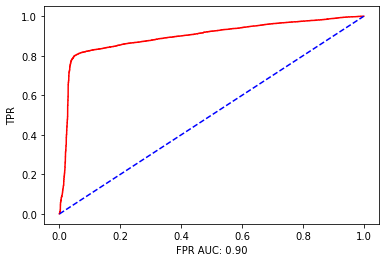

In [355]:
roc(ytest,model_lr.predict_proba(xtest)[:,1])

### AdaBoost Classifier

In [356]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
model_abc=abc.fit(xtrain,ytrain)
ypred_abc=model_abc.predict(xtest)

In [357]:
score(ytest,ypred_abc)

confusion_matrix 
 [[3661  673]
 [ 969 7298]]
*******************************
cohen_kappa_score 0.7158730449936066
*******************************
accuracy 0.8696928815173399
*******************************
recall 0.8827869843957905
*******************************
auc_score 0.8637515909519331
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.79      0.84      0.82      4334
           1       0.92      0.88      0.90      8267

    accuracy                           0.87     12601
   macro avg       0.85      0.86      0.86     12601
weighted avg       0.87      0.87      0.87     12601

*******************************
F1 score 
 0.8988791723118611


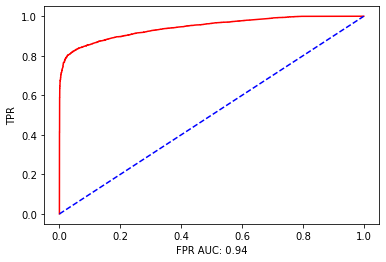

In [358]:
roc(ytest,model_abc.predict_proba(xtest)[:,1])

### GradientBoost Classifier

In [359]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
model_gbc=gbc.fit(xtrain,ytrain)
ypred_gbc=model_gbc.predict(xtest)

In [360]:
score(ytest,ypred_gbc)

confusion_matrix 
 [[3968  366]
 [ 833 7434]]
*******************************
cohen_kappa_score 0.7944270327694238
*******************************
accuracy 0.9048488215221014
*******************************
recall 0.8992379339542761
*******************************
auc_score 0.9073946937883977
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      4334
           1       0.95      0.90      0.93      8267

    accuracy                           0.90     12601
   macro avg       0.89      0.91      0.90     12601
weighted avg       0.91      0.90      0.91     12601

*******************************
F1 score 
 0.9253749922200785


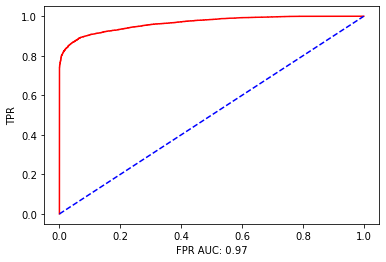

In [361]:
roc(ytest,model_gbc.predict_proba(xtest)[:,1])

### RandomForest Classifier

In [362]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf=rf.fit(xtrain,ytrain)
ypred_rf=model_rf.predict(xtest)

In [363]:
score(ytest,ypred_rf)

confusion_matrix 
 [[4240   94]
 [ 152 8115]]
*******************************
cohen_kappa_score 0.9568785892533046
*******************************
accuracy 0.9804777398619158
*******************************
recall 0.9816136446111043
*******************************
auc_score 0.9799623368417772
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4334
           1       0.99      0.98      0.99      8267

    accuracy                           0.98     12601
   macro avg       0.98      0.98      0.98     12601
weighted avg       0.98      0.98      0.98     12601

*******************************
F1 score 
 0.9850691915513473


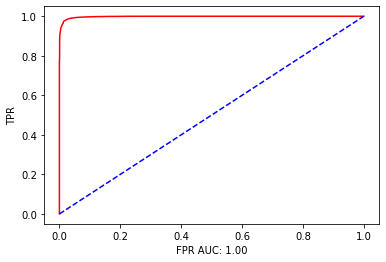

In [364]:
roc(ytest,model_rf.predict_proba(xtest)[:,1])

### DecisionTree Classifier

In [365]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain,ytrain)
ypred_dt=model_dt.predict(xtest)

In [366]:
score(ytest,ypred_dt)

confusion_matrix 
 [[4003  331]
 [ 324 7943]]
*******************************
cohen_kappa_score 0.8847750950795276
*******************************
accuracy 0.9480199984128244
*******************************
recall 0.9608080319341962
*******************************
auc_score 0.9422175831106145
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      4334
           1       0.96      0.96      0.96      8267

    accuracy                           0.95     12601
   macro avg       0.94      0.94      0.94     12601
weighted avg       0.95      0.95      0.95     12601

*******************************
F1 score 
 0.9604014267577534


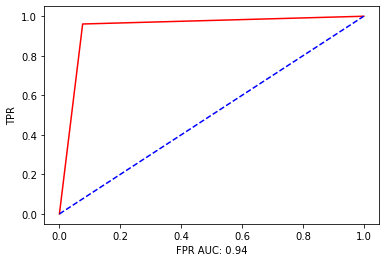

In [367]:
roc(ytest,model_dt.predict_proba(xtest)[:,1])

### GaussianNB

In [368]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model_gnb=gnb.fit(xtrain,ytrain)
ypred_gnb=model_gnb.predict(xtest)

In [369]:
score(ytest,ypred_gnb)

confusion_matrix 
 [[3983  351]
 [1451 6816]]
*******************************
cohen_kappa_score 0.7011633243427462
*******************************
accuracy 0.8569954765494802
*******************************
recall 0.8244828837546873
*******************************
auc_score 0.871747671688142
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.73      0.92      0.82      4334
           1       0.95      0.82      0.88      8267

    accuracy                           0.86     12601
   macro avg       0.84      0.87      0.85     12601
weighted avg       0.88      0.86      0.86     12601

*******************************
F1 score 
 0.8832447842425813


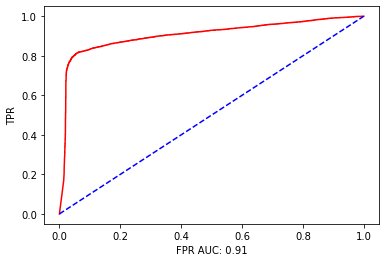

In [370]:
roc(ytest,model_gnb.predict_proba(xtest)[:,1])

### KNeighbors Classifier

In [371]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model_knn=knn.fit(xtrain,ytrain)
ypred_knn=model_knn.predict(xtest)

In [372]:
score(ytest,ypred_knn)

confusion_matrix 
 [[3869  465]
 [ 554 7713]]
*******************************
cohen_kappa_score 0.8216816336951166
*******************************
accuracy 0.9191334021109436
*******************************
recall 0.9329865731220516
*******************************
auc_score 0.9128476935753314
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4334
           1       0.94      0.93      0.94      8267

    accuracy                           0.92     12601
   macro avg       0.91      0.91      0.91     12601
weighted avg       0.92      0.92      0.92     12601

*******************************
F1 score 
 0.938035877166312


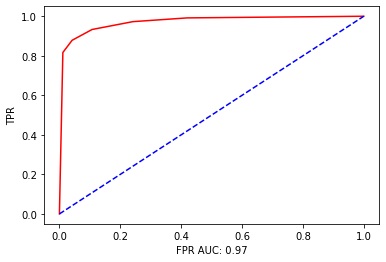

In [373]:
roc(ytest,model_knn.predict_proba(xtest)[:,1])

In [374]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
xtrain_s,ytrain_s=s.fit_resample(xtrain,ytrain)

In [324]:
def score(acc,pred):
    print('confusion_matrix \n',confusion_matrix(acc,pred))
    print("*******************************")
    print('cohen_kappa_score',cohen_kappa_score(acc,pred))
    print("*******************************")
    print('accuracy',accuracy_score(acc,pred))
    print("*******************************")
    print('recall',recall_score(acc,pred))
    print("*******************************")
    print('auc_score',roc_auc_score(acc,pred))
    print("*******************************")
    print('classification_report \n',classification_report(acc,pred))
    print("*******************************")
    print('F1 score \n',f1_score(acc,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

LogisticRegression()
******************************
confusion_matrix 
 [[3962  372]
 [1486 6781]]
*******************************
cohen_kappa_score 0.6920996208849697
*******************************
accuracy 0.8525513848107293
*******************************
recall 0.8202491835006653
*******************************
auc_score 0.867208117361777
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      4334
           1       0.95      0.82      0.88      8267

    accuracy                           0.85     12601
   macro avg       0.84      0.87      0.84     12601
weighted avg       0.87      0.85      0.86     12601

*******************************
F1 score 
 0.8795071335927368
None


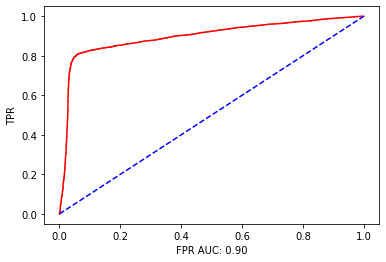

None
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------
AdaBoostClassifier()
******************************
confusion_matrix 
 [[3803  531]
 [1129 7138]]
*******************************
cohen_kappa_score 0.7173682200137306
*******************************
accuracy 0.8682644234584557
*******************************
recall 0.8634329260916899
*******************************
auc_score 0.8704566568621809
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      4334
           1       0.93      0.86      0.90      8267

    accuracy                           0.87     12601
   macro avg       0.85      0.87      0.86     12601
weighted avg       0.88      0.87      0.87     12601

*******************************
F1 score 
 0.8958333333333334
None


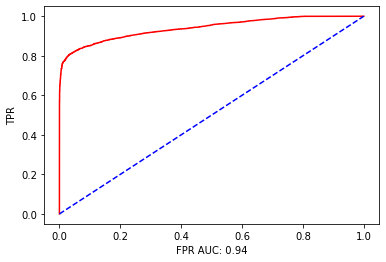

None
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------
GradientBoostingClassifier()
******************************
confusion_matrix 
 [[4096  238]
 [1000 7267]]
*******************************
cohen_kappa_score 0.7910391146766776
*******************************
accuracy 0.9017538290611856
*******************************
recall 0.879037135599371
*******************************
auc_score 0.9120612535403408
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      4334
           1       0.97      0.88      0.92      8267

    accuracy                           0.90     12601
   macro avg       0.89      0.91      0.90     12601
weighted avg       0.91      0.90      0.90     12601

*******************************
F1 score 
 0.9215064671569871
None


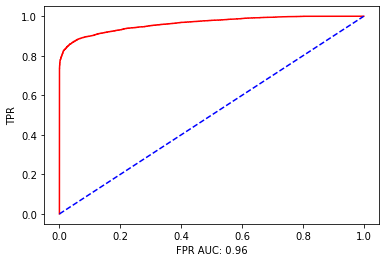

None
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------
RandomForestClassifier()
******************************
confusion_matrix 
 [[4267   67]
 [ 410 7857]]
*******************************
cohen_kappa_score 0.9176702764617958
*******************************
accuracy 0.9621458614395683
*******************************
recall 0.9504052255957421
*******************************
auc_score 0.9674730327332656
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      4334
           1       0.99      0.95      0.97      8267

    accuracy                           0.96     12601
   macro avg       0.95      0.97      0.96     12601
weighted avg       0.96      0.96      0.96     12601

*******************************
F1 score 
 0.9705391884380212
None


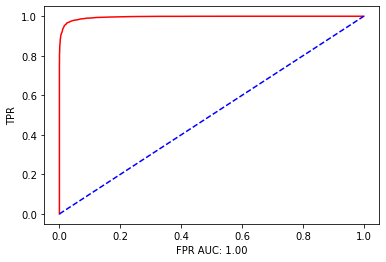

None
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------
DecisionTreeClassifier()
******************************
confusion_matrix 
 [[3941  393]
 [ 462 7805]]
*******************************
cohen_kappa_score 0.8502169471420115
*******************************
accuracy 0.9321482422029997
*******************************
recall 0.9441151566469094
*******************************
auc_score 0.9267183997355452
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      4334
           1       0.95      0.94      0.95      8267

    accuracy                           0.93     12601
   macro avg       0.92      0.93      0.93     12601
weighted avg       0.93      0.93      0.93     12601

*******************************
F1 score 
 0.9480716671727908
None


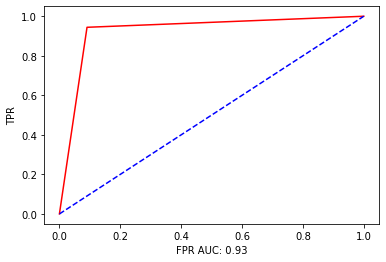

None
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------
GaussianNB()
******************************
confusion_matrix 
 [[4008  326]
 [1469 6798]]
*******************************
cohen_kappa_score 0.7029852426882318
*******************************
accuracy 0.8575509880168241
*******************************
recall 0.822305552195476
*******************************
auc_score 0.8735431775744339
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.73      0.92      0.82      4334
           1       0.95      0.82      0.88      8267

    accuracy                           0.86     12601
   macro avg       0.84      0.87      0.85     12601
weighted avg       0.88      0.86      0.86     12601

*******************************
F1 score 
 0.8833734000389839
None


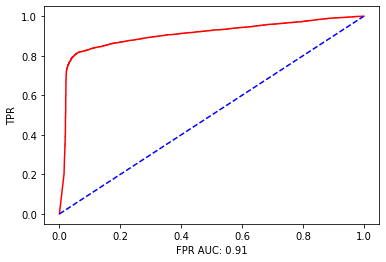

None
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------
KNeighborsClassifier()
******************************
confusion_matrix 
 [[4079  255]
 [ 696 7571]]
*******************************
cohen_kappa_score 0.8367203658876171
*******************************
accuracy 0.924529799222284
*******************************
recall 0.9158098463771622
*******************************
auc_score 0.928486372196426
*******************************
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      4334
           1       0.97      0.92      0.94      8267

    accuracy                           0.92     12601
   macro avg       0.91      0.93      0.92     12601
weighted avg       0.93      0.92      0.93     12601

*******************************
F1 score 
 0.9409059839681849
None


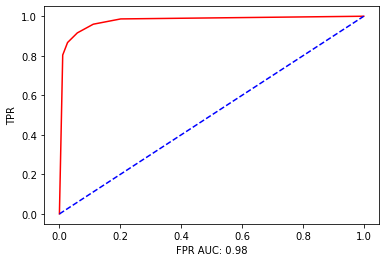

None
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------


In [376]:
a=[]
for i in [lr,abc,gbc,rf,dt,gnb,knn]:
    print(i)
    print("******************************")
    model_s=i.fit(xtrain_s,ytrain_s)
    ypred_s=model_s.predict(xtest)
    print(score(ytest,ypred_s))
    print(roc(ytest,model_s.predict_proba(xtest)[:,1]))
    a.append(f1_score(ytest,ypred_s))
    print("-----------------------------------------------")
    print("-----------------------------------------------")
    print("-----------------------------------------------")

## finding best parameters with sfs

In [332]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1=sfs(estimator=abc,k_features="best",forward=True,scoring="f1")
sfs1.fit(X,y)
sfs1.k_feature_names_

('Customer_ID',
 'Num_Bank_Accounts',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly')

In [377]:
a

[0.8795071335927368,
 0.8958333333333334,
 0.9215064671569871,
 0.9705391884380212,
 0.9480716671727908,
 0.8833734000389839,
 0.9409059839681849]

In [386]:
pd.DataFrame({"F1 score":[0.8722629988281009,0.8988791723118611,0.9253749922200785,0.9850691915513473,0.9604014267577534,0.8832447842425813,0.938035877166312],
              "F1 score after SMOTE()":a},
             index=["Logistic Regression","AdaBoost Classifier","GradientBoost Classifier","RandomForest","DecisionTree","GaussianNB","KNeighbors Classifier"])

,F1 score,F1 score after SMOTE()
Logistic Regression,0.872263,0.879507
AdaBoost Classifier,0.898879,0.895833
GradientBoost Classifier,0.925375,0.921506
RandomForest,0.985069,0.970539
DecisionTree,0.960401,0.948072
GaussianNB,0.883245,0.883373
KNeighbors Classifier,0.938036,0.940906
